# **Cancer Diagnosis**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1.1 importing libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv('/content/drive/My Drive/Applied AI/Datasets/Cancer Diagnosis/training_variants')
df.head()

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [0]:
pd.read_csv('/content/drive/My Drive/Applied AI/Datasets/Cancer Diagnosis/training_text', sep='\|\|')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,"ID,Text"
0,Cyclin-dependent kinases (CDKs) regulate a var...
1,Abstract Background Non-small cell lung canc...
2,Abstract Background Non-small cell lung canc...
3,Recent evidence has demonstrated that acquired...
4,Oncogenic mutations in the monomeric Casitas B...
...,...
3316,Introduction Myelodysplastic syndromes (MDS) ...
3317,Introduction Myelodysplastic syndromes (MDS) ...
3318,The Runt-related transcription factor 1 gene (...
3319,The RUNX1/AML1 gene is the most frequent targe...


In [0]:
pd.read_csv('/content/drive/My Drive/Applied AI/Datasets/Cancer Diagnosis/training_text', sep='\|\|', names=['Id', 'text'], engine='python')

,Id,text
0,"ID,Text",None
1,0,Cyclin-dependent kinases (CDKs) regulate a var...
2,1,Abstract Background Non-small cell lung canc...
3,2,Abstract Background Non-small cell lung canc...
4,3,Recent evidence has demonstrated that acquired...
...,...,...
3317,3316,Introduction Myelodysplastic syndromes (MDS) ...
3318,3317,Introduction Myelodysplastic syndromes (MDS) ...
3319,3318,The Runt-related transcription factor 1 gene (...
3320,3319,The RUNX1/AML1 gene is the most frequent targe...


In [0]:
df_1 = pd.read_csv('/content/drive/My Drive/Applied AI/Datasets/Cancer Diagnosis/training_text', sep='\|\|', names=['ID', 'Text'], engine='python', skiprows=1)
df_1.head()

,ID,Text
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


### 1.2 Preprocess text data

In [0]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re

stop_words = set(stopwords.words('english'))


def nlp_preprocess_text(total_text, row_no, column):
    if type(total_text) is not int:
        string = ''
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)  # replace every special character with space
        total_text = re.sub('\s+', ' ', total_text)             # replace multi spaces to single space
        total_text = total_text.lower()                         # lower all the characters

        for word in total_text.split():
            if word not in stop_words:
                string += word + ' '

        df_1[column][row_no] = string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
for index, row in df_1.iterrows():
    if type(row['Text']) is str:
        nlp_preprocess_text(row['Text'], index, 'Text')

    else:
        print('there is no description for id: %d'%index)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


there is no description for id: 1109
there is no description for id: 1277
there is no description for id: 1407
there is no description for id: 1639
there is no description for id: 2755


### 1.3 Merging both the dataframes

In [0]:
result = pd.merge(df, df_1, on='ID', how='left')
result.head()

,ID,Gene,Variation,Class,Text
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


In [0]:
result.isnull().sum()

ID           0
Gene         0
Variation    0
Class        0
Text         5
dtype: int64

### 1.4 Looking for any null values

In [0]:
result[result.isnull().any(1)]

,ID,Gene,Variation,Class,Text
1109,1109,FANCA,S1088F,1,NaN
1277,1277,ARID5B,Truncating Mutations,1,NaN
1407,1407,FGFR3,K508M,6,NaN
1639,1639,FLT1,Amplification,6,NaN
2755,2755,BRAF,G596C,7,NaN


In [0]:
# changing the 'NaN' values to 'Gene + Variation' values
result.loc[result['Text'].isnull(), 'Text'] = result['Gene'] + ' ' + result['Variation']

In [0]:
result.iloc[1109]

ID                   1109
Gene                FANCA
Variation          S1088F
Class                   1
Text         FANCA S1088F
Name: 1109, dtype: object

In [0]:
y = result['Class'].values
#before we replace the extra spaces('\s+') with a single space in Text, now its the same in Gene and Variation with '_'
result['Gene'] = result['Gene'].str.replace('\s+', '_')
result['Variation'] = result['Variation'].str.replace('\s+', '_')

In [0]:
result.head()

,ID,Gene,Variation,Class,Text
0,0,FAM58A,Truncating_Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


### 1.5 Splitting the data

In [0]:
from sklearn.model_selection import train_test_split
X_train, test_df , y_train, y_test = train_test_split(result, y, stratify=y, test_size=0.2)
train_df, cv_df , y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

In [0]:
print(train_df.shape)
print(cv_df.shape)
print(test_df.shape)
print(y_train.shape)
print(y_cv.shape)
print(y_test.shape)

(2124, 5)
(532, 5)
(665, 5)
(2124,)
(532,)
(665,)


In [0]:
train_df.head()

,ID,Gene,Variation,Class,Text
2360,2360,STK11,R304W,4,peutz jeghers syndrome pjs autosomal dominant ...
2107,2107,B2M,M1K,4,hodgkin lymphoma hl characterized minority b c...
2567,2567,BRCA1,T1685A,1,abstract brca1 gene individuals risk breast ov...
2799,2799,BRCA2,E2663V,1,mutation screening breast ovarian cancer predi...
474,474,TP53,I251S,1,half human cancers lose p53 function missense ...


## **2. EDA**

In [0]:
train_distributions = train_df['Class'].value_counts().sort_values(ascending=False)
test_distributions = test_df['Class'].value_counts().sort_values(ascending=False)
cv_distributions = cv_df['Class'].value_counts().sort_values(ascending=False)

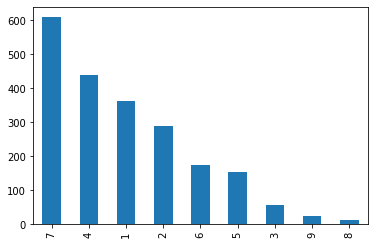

In [0]:
train_distributions.plot(kind='bar')

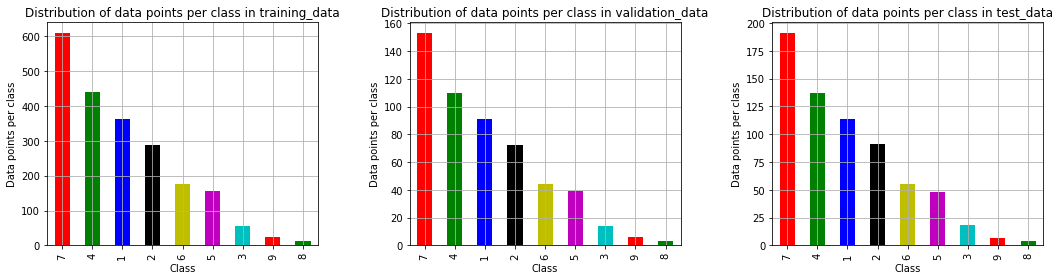

In [0]:
plt.figure(figsize= (15,4))

for i in range(1,4):
    plt.subplot(1,3,i)
    if i == 1:
        my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']
        train_distributions.plot(kind='bar', color=my_colors)
        plt.xlabel('Class')
        plt.ylabel('Data points per class')
        plt.title('Distribution of data points per class in training_data')
        plt.grid()
        
    if i == 2:
        my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']
        cv_distributions.plot(kind='bar', color=my_colors)
        plt.xlabel('Class')
        plt.ylabel('Data points per class')
        plt.title('Distribution of data points per class in validation_data')
        plt.grid()

    if i ==3:
        my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']
        test_distributions.plot(kind='bar', color=my_colors)
        plt.xlabel('Class')
        plt.ylabel('Data points per class')
        plt.title('Distribution of data points per class in test_data')
        plt.grid()

plt.tight_layout()

### 2.1 Plot confusion matrix

In [0]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_predicted):
    labels = list(result['Class'].unique())

    #confusion matrix
    C = confusion_matrix(y_true, y_predicted)

    #precision matrix
    A = ( (C.T)/(C.sum(axis=1)) ).T

    #recall matrix
    B = (C/C.sum(axis=0))

    print('='*20, 'Confusion Matrix', '='*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, fmt=".3f", cmap="YlGnBu", xticklabels=labels, yticklabels=labels)
    plt.ylabel('True class')
    plt.xlabel('Predicted class')   
    plt.show()

    print('='*20, 'Precision Matrix', '='*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, fmt=".3f", cmap="YlGnBu", xticklabels=labels, yticklabels=labels)
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()

    print('='*20, 'Recall Matrix', '='*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, fmt='.3f', cmap="YlGnBu", xticklabels=labels, yticklabels=labels)
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()

### 2.2 Univariate Analysis - Distribution of genes

In [0]:
unique_genes = train_df['Gene'].value_counts()
unique_genes.head()

BRCA1    146
TP53     110
EGFR      97
BRCA2     86
PTEN      82
Name: Gene, dtype: int64

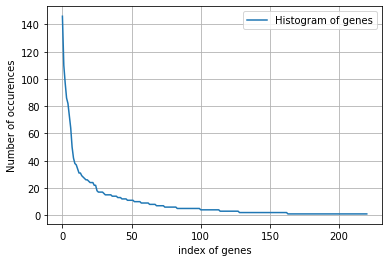

In [0]:
#distribution
h = unique_genes.values
plt.plot(h, label='Histogram of genes')
plt.xlabel('index of genes')
plt.ylabel('Number of occurences')
plt.grid()
plt.legend()
plt.show()

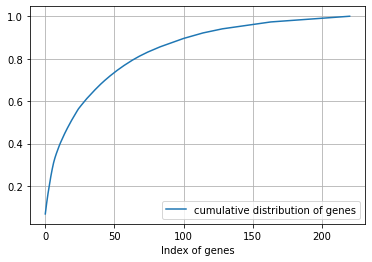

In [0]:
#cumulative distribution
cumsum = np.cumsum(unique_genes.values/sum(unique_genes.values))
plt.plot(cumsum, label='cumulative distribution of genes')
plt.xlabel('Index of genes')
plt.legend()
plt.grid()
plt.show()

### 2.3 Univariate Analysis - Distribution of Variations

In [0]:
unique_variations = train_df['Variation'].value_counts()
print(unique_variations)

Truncating_Mutations    64
Deletion                46
Amplification           37
Fusions                 20
Overexpression           5
                        ..
E317K                    1
K128T                    1
S502T                    1
D835Y                    1
F958S                    1
Name: Variation, Length: 1939, dtype: int64


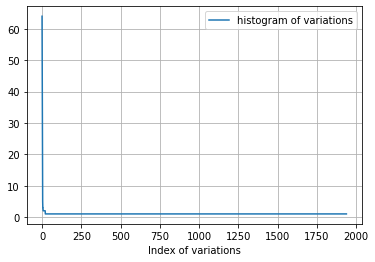

In [0]:
#PDF of Variation feature
plt.plot(unique_variations.values, label='histogram of variations')
plt.xlabel('Index of variations')
plt.legend()
plt.grid()
plt.show()

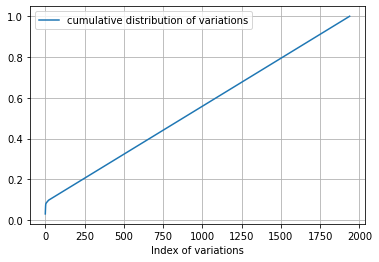

In [0]:
#CDF of variation feature
cumsum = np.cumsum(unique_variations.values/sum(unique_variations.values))
plt.plot(cumsum, label='cumulative distribution of variations')
plt.xlabel('Index of variations')
plt.legend()
plt.grid()
plt.show()

#  **TASK - 1 : TFIDF feautres**

## 2.3 Encoding of Features
- Tf-idf encoding
- Response encoding

### 2.3.1 Tf-idf encoding

In [0]:
# 1. Tfidf for Gene feature
from sklearn.feature_extraction.text import TfidfVectorizer
gene_vectorizer = TfidfVectorizer()
train_gene_tfidf = gene_vectorizer.fit_transform(train_df['Gene'])
cv_gene_tfidf = gene_vectorizer.transform(cv_df['Gene'])
test_gene_tfidf = gene_vectorizer.transform(test_df['Gene'])

In [0]:
# 2. Tfidf for Variation feature
variation_vectorizer = TfidfVectorizer()
train_var_tfidf = variation_vectorizer.fit_transform(train_df['Variation'])
cv_var_tfidf = variation_vectorizer.transform(cv_df['Variation'])
test_var_tfidf = variation_vectorizer.transform(test_df['Variation'])

In [0]:
# 3. Tfidf for Text feautre
text_vectorizer = TfidfVectorizer()
train_text_tfidf = text_vectorizer.fit_transform(train_df['Text'])
cv_text_tfidf = text_vectorizer.transform(cv_df['Text'])
test_text_tfidf = text_vectorizer.transform(test_df['Text'])

 ### **2.3.2 Response Encoding**

#### 2.3.2.1 For categorical features

In [0]:
# Response coding : https://medium.com/@thewingedwolf.winterfell/response-coding-for-categorical-data-7bb8916c6dc1
#1. form a response table

def get_response_table(alpha, feature, df):    # get response table for gene and variation since both are categorical data
    counts = df[feature].value_counts()

    response_table_dict = dict()

    for i , denominator in counts.items():
        vec = []
        for k in range(1,10): #9 different classes
            cls_cnt = df.loc[(df['Class']==k) & (df[feature]==i)]
            vec.append( (cls_cnt.shape[0]+(alpha*10))/ (denominator+(alpha*90)) )

        response_table_dict[i] = vec

    return response_table_dict

In [0]:
def get_response_encoded_feature(alpha, feature, df, training_df):
    response_table_dict = get_response_table(alpha, feature, df)

    counts = training_df[feature].value_counts()     #checking the count in trianing_data

    encoded_feature = []
    for index, row in df.iterrows():    
        if row[feature] in dict(counts).keys():   # if the feature for the df(train, test, cv) is in training data then take from response_table_dict else add [1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9]
            encoded_feature.append(response_table_dict[row[feature]])

        else:
            encoded_feature.append([(1/result['Class'].nunique()) for i in list(result['Class'].unique())])  #put [1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9] by code

    return encoded_feature

In [0]:
# 1. Response encoding for gene feature
alpha = 1
train_resp_encoded_gene = np.array(get_response_encoded_feature(alpha, 'Gene', train_df, train_df))
test_resp_encoded_gene = np.array(get_response_encoded_feature(alpha, 'Gene', test_df, train_df))
cv_resp_encoded_gene = np.array(get_response_encoded_feature(alpha, 'Gene', cv_df, train_df))

In [0]:
# 2. Response encoding for variation feature
alpha = 1
train_resp_encoded_var = np.array(get_response_encoded_feature(alpha, 'Variation', train_df, train_df))
test_resp_encoded_var = np.array(get_response_encoded_feature(alpha, 'Variation', test_df, train_df))
cv_resp_encoded_var = np.array(get_response_encoded_feature(alpha, 'Variation', cv_df, train_df))

#### 2.3.2.2 For text feature

In [0]:
# 3.Response Encoding for text feature --- it can be done with using naive bayes method P(y=1|w_1 w_2 ... w_k) = product(i=1 to k) P(y=1|w_i)   ==> (number of times y=1 and w_i occurs + alpha)/( w_i + C*alpha)
# Steps: 
#       1. get the dictionary(dict_list) which contains all items based on class, 
#       2. get another dictionary(total_dict) which has words as key and its value is incremented whenever the word repeated
#       3. use dict_list to get the class and find the sum_prob 
#       4. use total_dict to get the word in that specific class from dict_list 
#dict_list consists 9 dictionaries corresponds to each class
dict_list = []
for i in range (1,10):
    cls_text = train_df[train_df['Class']==i]
    dict_list.append(cls_text)

In [0]:
from collections import defaultdict

def extract_dictionary_paddle(training_dataframe):
    dictionary = defaultdict(int)
    for index, row in training_dataframe.iterrows():
        for word in row['Text'].split():
            dictionary[word] += 1

    return dictionary

# dict_list[i] is build on i'th  class text data
# total_dict is buid on whole training text data
total_dict = extract_dictionary_paddle(train_df)

In [0]:
#response coding for text data
import math
def get_text_response_coding(dataframe):
    text_feature_resp_encoding = np.zeros(shape=(dataframe.shape[0], 9))
    for i in range(0,9):
        row_index = 0
        for index, row in dataframe.iterrows():
            sum_prob = 0
            for word in row['Text'].split():
                sum_prob += math.log((dict_list[i].get(word, 0)+10)/ (dict_list[i].get(word, 0)+90))  # dict.get(key, value) if key is not found 'value' will be returned, and we took 'log' becoz product of probabilites return very small values
            text_feature_resp_encoding[row_index][i] = math.exp(sum_prob/len(row['Text'].split()))    #we use 'sum_prob' as 'log of multiplication' becomes 'addition' on previous step and log' on LHS bcomes 'exp' on the right hand side
            row_index +=  1

    return text_feature_resp_encoding

In [0]:
train_text_response_encoding = get_text_response_coding(train_df)
test_text_response_encoding = get_text_response_coding(test_df)
cv_text_response_encoding = get_text_response_coding(cv_df)

#making the each row value adds to 1 (i.e  normalizing)
train_text_response_encoding = (train_text_response_encoding.T/train_text_response_encoding.sum(axis=1)).T
test_text_response_encoding = (test_text_response_encoding.T/test_text_response_encoding.sum(axis=1)).T
cv_text_response_encoding = (cv_text_response_encoding.T/cv_text_response_encoding.sum(axis=1)).T

In [0]:
# pickling it for future use
import pickle
pickle_out = open('train_text_response_encoding', 'wb')
pickle.dump(train_text_response_encoding, pickle_out)
pickle_out.close()

pickle_out = open('test_text_response_encoding', 'wb')
pickle.dump(test_text_response_encoding, pickle_out)
pickle_out.close()

pickle_out = open('cv_text_response_encoding', 'wb')
pickle.dump(cv_text_response_encoding, pickle_out)
pickle_out.close()

#copying the pickle files to the location we needed
!cp train_text_response_encoding '/content/drive/My Drive/Applied AI/Assignment /Assignment 17- Cancer diagnosis'
!cp test_text_response_encoding '/content/drive/My Drive/Applied AI/Assignment /Assignment 17- Cancer diagnosis'
!cp cv_text_response_encoding '/content/drive/My Drive/Applied AI/Assignment /Assignment 17- Cancer diagnosis'

In [0]:
# loading the data from pickle
import pickle
with open('/content/drive/My Drive/Applied AI/Assignment /Assignment 17- Cancer diagnosis/train_text_response_encoding', 'rb') as f:
    train_text_response_encoding = pickle.load(f)

with open('/content/drive/My Drive/Applied AI/Assignment /Assignment 17- Cancer diagnosis/cv_text_response_encoding', 'rb') as f:
    cv_text_response_encoding = pickle.load(f)

with open('/content/drive/My Drive/Applied AI/Assignment /Assignment 17- Cancer diagnosis/test_text_response_encoding', 'rb') as f:
    test_text_response_encoding = pickle.load(f)

In [0]:
print(train_text_response_encoding.shape)
print(test_text_response_encoding.shape)
print(cv_text_response_encoding.shape)

(2124, 9)
(665, 9)
(532, 9)


## 3. Model-1 : SGDclassifier (log_loss) - train_gene_tfidf
- We are modelling only tfidf encode of gene to see how much the tfidf encoded feature is good for modelling

In [0]:
print(train_gene_tfidf.shape)
print(y_train.shape)
print(cv_gene_tfidf.shape)
print(y_cv.shape)

(2124, 233)
(2124,)
(532, 233)
(532,)


In [0]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss

alpha = [10**x for x in range(-5,1)]

cv_log_loss = []
for i in alpha :
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_gene_tfidf, y_train)
    calib_clf = CalibratedClassifierCV(clf, method='sigmoid')
    calib_clf.fit(train_gene_tfidf, y_train)
    predict_y = calib_clf.predict_proba(cv_gene_tfidf)
    logloss  = log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15)
    cv_log_loss.append(logloss)
    print('For the value of alpha:{}, the log_loss is {}'.format(i, logloss))

For the value of alpha:1e-05, the log_loss is 1.2248006822857576
For the value of alpha:0.0001, the log_loss is 1.1916002539076753
For the value of alpha:0.001, the log_loss is 1.2167626551138278
For the value of alpha:0.01, the log_loss is 1.3443535017024604
For the value of alpha:0.1, the log_loss is 1.4408754469478242
For the value of alpha:1, the log_loss is 1.4722974799622857


### 3.1 Plotting Hyperparameter vs Log_loss

1e-05 : 1.2248006822857576
0.0001 : 1.1916002539076753
0.001 : 1.2167626551138278
0.01 : 1.3443535017024604
0.1 : 1.4408754469478242
1 : 1.4722974799622857


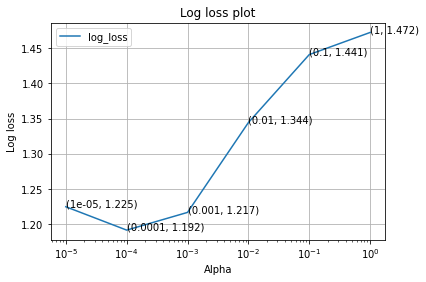

In [0]:
plt.plot(alpha, cv_log_loss, label='log_loss')
for i, j in enumerate(cv_log_loss):
  print(alpha[i],':',j)
  plt.annotate((alpha[i], np.round(j, 3)), (alpha[i], j))
plt.title('Log loss plot')
plt.xlabel('Alpha')
plt.ylabel('Log loss')
plt.xscale('log')
plt.legend()
plt.grid()
plt.show()

### 3.2 Modelling by best Hyperparameter

In [0]:
best_alpha = alpha[np.argmin(cv_log_loss)]
clf = SGDClassifier(alpha=best_alpha, loss='log', penalty='l2', random_state=42)
clf.fit(train_gene_tfidf, y_train)
calib_clf = CalibratedClassifierCV(clf, method='sigmoid')
calib_clf.fit(train_gene_tfidf, y_train)


predicted_y = calib_clf.predict_proba(train_gene_tfidf)
print('Training log loss for tfidf encoded gene feature:', log_loss(y_train, predicted_y, labels=clf.classes_, eps=1e-15))

predicted_y = calib_clf.predict_proba(cv_gene_tfidf)
print('Cv log loss for tfidf encoded gene feature:', log_loss(y_cv, predicted_y, labels=clf.classes_, eps=1e-15))

predicted_y = calib_clf.predict_proba(test_gene_tfidf)
print('Test log loss for tfidf encoded gene feature:', log_loss(y_test, predicted_y, labels=clf.classes_, eps=1e-15))

Training log loss for tfidf encoded gene feature: 0.982430685931709
Cv log loss for tfidf encoded gene feature: 1.1916002539076753
Test log loss for tfidf encoded gene feature: 1.2063709781859027


### 3.3 Is gene feature stable across all data(train, cv, test)

In [0]:
#Train_genes contain 229 genes. How many data points in cv and test genes that contains out of these 229 genes?
print('Percentage of number of genes presented in cv from training :',(cv_df[cv_df['Gene'].isin(list(set(train_df['Gene'])))].shape[0] / cv_df['Gene'].shape[0] )*100)
print('Percentage of number of genes presented in test from training:', (test_df[test_df['Gene'].isin(list(set(train_df['Gene'])))].shape[0] / test_df['Gene'].shape[0]) *100)

Percentage of number of genes presented in cv from training : 97.74436090225564
Percentage of number of genes presented in test from training: 96.69172932330827


# 4. Model-2 : Logistic Regression with Variation tfidf encoding
We are modelling only tfidf encode of Variation to see how much the tfidf encoded feature is good for modelling

In [0]:
print(train_var_tfidf.shape)
print(y_train.shape)
print(cv_var_tfidf.shape)
print(y_cv.shape)

(2124, 1957)
(2124,)
(532, 1957)
(532,)


In [0]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss

alpha = [10**x for x in range(-5,1)]

cv_log_loss = []
for i in alpha :
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_var_tfidf, y_train)
    calib_clf = CalibratedClassifierCV(clf, method='sigmoid')
    calib_clf.fit(train_var_tfidf, y_train)
    predict_y = calib_clf.predict_proba(cv_var_tfidf)
    logloss  = log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15)
    cv_log_loss.append(logloss)
    print('For the value of alpha:{}, the log_loss is {}'.format(i, logloss))

For the value of alpha:1e-05, the log_loss is 1.6827160572998519
For the value of alpha:0.0001, the log_loss is 1.6824587973480671
For the value of alpha:0.001, the log_loss is 1.6865260872381658
For the value of alpha:0.01, the log_loss is 1.7009514245719888
For the value of alpha:0.1, the log_loss is 1.7131008252519953
For the value of alpha:1, the log_loss is 1.7135125595092275


### 4.1 Hyperparameter vs Log loss

1e-05 : 1.6827160572998519
0.0001 : 1.6824587973480671
0.001 : 1.6865260872381658
0.01 : 1.7009514245719888
0.1 : 1.7131008252519953
1 : 1.7135125595092275


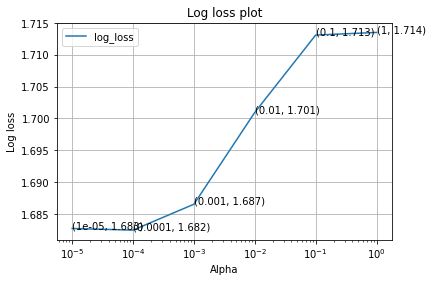

In [0]:
plt.plot(alpha, cv_log_loss, label='log_loss')
for i, j in enumerate(cv_log_loss):
  print(alpha[i],':',j)
  plt.annotate((alpha[i], np.round(j, 3)), (alpha[i], j))
plt.title('Log loss plot')
plt.xlabel('Alpha')
plt.ylabel('Log loss')
plt.xscale('log')
plt.legend()
plt.grid()
plt.show()

### 4.2 Modelling by best Hyperparameter

In [0]:
best_alpha = alpha[np.argmin(cv_log_loss)]
clf = SGDClassifier(alpha=best_alpha, loss='log', penalty='l2', random_state=42)
clf.fit(train_var_tfidf, y_train)
calib_clf = CalibratedClassifierCV(clf, method='sigmoid')
calib_clf.fit(train_var_tfidf, y_train)


predicted_y = calib_clf.predict_proba(train_var_tfidf)
print('Training log loss for tfidf encoded gene feature:', log_loss(y_train, predicted_y, labels=clf.classes_, eps=1e-15))

predicted_y = calib_clf.predict_proba(cv_var_tfidf)
print('Cv log loss for tfidf encoded gene feature:', log_loss(y_cv, predicted_y, labels=clf.classes_, eps=1e-15))

predicted_y = calib_clf.predict_proba(test_var_tfidf)
print('Test log loss for tfidf encoded gene feature:', log_loss(y_test, predicted_y, labels=clf.classes_, eps=1e-15))

Training log loss for tfidf encoded gene feature: 0.6385660717078283
Cv log loss for tfidf encoded gene feature: 1.6824587973480671
Test log loss for tfidf encoded gene feature: 1.7372960052659405


### 4.3 Is Variation stable across all data

In [0]:
#Train_genes contain 229 genes. How many data points in cv and test genes that contains out of these 229 genes?
print('Percentage of number of genes presented in cv from training :',(cv_df[cv_df['Variation'].isin(list(set(train_df['Variation'])))].shape[0] / cv_df['Variation'].shape[0] )*100)
print('Percentage of number of genes presented in test from training:', (test_df[test_df['Variation'].isin(list(set(train_df['Variation'])))].shape[0] / test_df['Variation'].shape[0]) *100)

Percentage of number of genes presented in cv from training : 12.218045112781954
Percentage of number of genes presented in test from training: 8.721804511278195


# 5. Model-3 : train_text_tfidf

In [0]:
print(train_text_tfidf.shape)
print(y_train.shape)
print(cv_text_tfidf.shape)
print(y_cv.shape)

(2124, 121932)
(2124,)
(532, 121932)
(532,)


In [0]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss

alpha = [10**x for x in range(-5,1)]

cv_log_loss = []
for i in alpha :
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_text_tfidf, y_train)
    calib_clf = CalibratedClassifierCV(clf, method='sigmoid')
    calib_clf.fit(train_text_tfidf, y_train)
    predict_y = calib_clf.predict_proba(cv_text_tfidf)
    logloss  = log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15)
    cv_log_loss.append(logloss)
    print('For the value of alpha:{}, the log_loss is {}'.format(i, logloss))

For the value of alpha:1e-05, the log_loss is 1.0578714984413375
For the value of alpha:0.0001, the log_loss is 1.0334280154326647
For the value of alpha:0.001, the log_loss is 1.10835319039567
For the value of alpha:0.01, the log_loss is 1.2811187170527603
For the value of alpha:0.1, the log_loss is 1.5255300569840695
For the value of alpha:1, the log_loss is 1.5973007379857136


### 5.2 Hyperparameter vs Log loss

1e-05 : 1.0578714984413375
0.0001 : 1.0334280154326647
0.001 : 1.10835319039567
0.01 : 1.2811187170527603
0.1 : 1.5255300569840695
1 : 1.5973007379857136


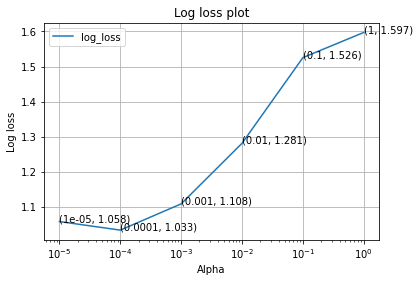

In [0]:
plt.plot(alpha, cv_log_loss, label='log_loss')
for i, j in enumerate(cv_log_loss):
  print(alpha[i],':',j)
  plt.annotate((alpha[i], np.round(j, 3)), (alpha[i], j))
plt.title('Log loss plot')
plt.xlabel('Alpha')
plt.ylabel('Log loss')
plt.xscale('log')
plt.legend()
plt.grid()
plt.show()

### 5.3 Modelling by best hyperparameter

In [0]:
best_alpha = alpha[np.argmin(cv_log_loss)]
clf = SGDClassifier(alpha=best_alpha, loss='log', penalty='l2', random_state=42)
clf.fit(train_text_tfidf, y_train)
calib_clf = CalibratedClassifierCV(clf, method='sigmoid')
calib_clf.fit(train_text_tfidf, y_train)


predicted_y = calib_clf.predict_proba(train_text_tfidf)
print('Training log loss for tfidf encoded gene feature:', log_loss(y_train, predicted_y, labels=clf.classes_, eps=1e-15))

predicted_y = calib_clf.predict_proba(cv_text_tfidf)
print('Cv log loss for tfidf encoded gene feature:', log_loss(y_cv, predicted_y, labels=clf.classes_, eps=1e-15))

predicted_y = calib_clf.predict_proba(test_text_tfidf)
print('Test log loss for tfidf encoded gene feature:', log_loss(y_test, predicted_y, labels=clf.classes_, eps=1e-15))

Training log loss for tfidf encoded gene feature: 0.6486798800596857
Cv log loss for tfidf encoded gene feature: 1.0334280154326647
Test log loss for tfidf encoded gene feature: 1.0664750670491008


### 5.3 Is text feature stable across all data

In [0]:
# we can find it using how mych intersection of words from train in cv and test data
from sklearn.feature_extraction.text import CountVectorizer

def intersection_of_words(training_df, other_df):
    #train_df
    vec = CountVectorizer(min_df=3)
    train_fea = vec.fit_transform(training_df['Text'])
    train_fea_words = vec.get_feature_names()

    #other df
    vec = CountVectorizer(min_df=3)
    other_fea = vec.fit_transform(other_df['Text'])
    other_fea_words = vec.get_feature_names()

    len1 = len(set(other_fea_words))
    len2 = len(set(train_fea_words) & set(other_fea_words))

    return len1, len2

In [0]:
len1,len2 = intersection_of_words(train_df, cv_df)
print('{}% of words from train data in cv '.format(np.round((len2/len1)*100, 3)))
len1, len2 = intersection_of_words(train_df, test_df)
print('{}% of words from train data in test'.format(np.round((len2/len1)*100, 3)))

98.446% of words from train data in cv 
97.894% of words from train data in test


# 6. Model -4: Stacked tfidf features

In [0]:
# stacking the tfidf encoded features
from scipy.sparse import hstack
train_gene_var_tfidf_encoding = hstack((train_gene_tfidf, train_var_tfidf))
test_gene_var_tfidf_encoding = hstack((test_gene_tfidf, test_var_tfidf))
cv_gene_var_tfidf_encoding = hstack((cv_gene_tfidf, cv_var_tfidf))

train_x_tfidf_encoding = hstack((train_gene_var_tfidf_encoding, train_text_tfidf)).tocsr()
test_x_tfidf_encoding = hstack((test_gene_var_tfidf_encoding, test_text_tfidf)).tocsr()
cv_x_tfidf_encoding = hstack((cv_gene_var_tfidf_encoding, cv_text_tfidf)).tocsr()

y_train = np.array(list(train_df['Class']))
y_test = np.array(list(test_df['Class']))
y_cv = np.array(list(cv_df['Class']))

In [0]:
print(train_x_tfidf_encoding.shape)
print(test_x_tfidf_encoding.shape)
print(cv_x_tfidf_encoding.shape)
print(y_train.shape)
print(y_test.shape)
print(y_cv.shape)

(2124, 127300)
(665, 127300)
(532, 127300)
(2124,)
(665,)
(532,)


### 6.1 Model - Naive Bayes

In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss

alpha = [10**x for x in range(-5,3)]
cv_log_loss = []
for i in alpha:
    clf = MultinomialNB(alpha=i)
    clf.fit(train_x_tfidf_encoding, train_y)
    calib_clf = CalibratedClassifierCV(clf, method='sigmoid')
    calib_clf.fit(train_x_tfidf_encoding, y_train)
    pred_y = calib_clf.predict_proba(cv_x_tfidf_encoding)
    cv_log_loss.append(log_loss(cv_y, pred_y, labels=clf.classes_, eps=1e-15))
    print('For alpha =', i)
    print('log loss = ', log_loss(cv_y, pred_y, labels=clf.classes_, eps=1e-15))

For alpha = 1e-05
log loss =  1.2157775467495908
For alpha = 0.0001
log loss =  1.2117816651898865
For alpha = 0.001
log loss =  1.2051075108188618
For alpha = 0.01
log loss =  1.1987991466611854
For alpha = 0.1
log loss =  1.2531170767629505
For alpha = 1
log loss =  1.2607402115961563
For alpha = 10
log loss =  1.265046277181232
For alpha = 100
log loss =  1.3034654453556935


In [0]:
print(cv_log_loss)

[1.2157775467495908, 1.2117816651898865, 1.2051075108188618, 1.1987991466611854, 1.2531170767629505, 1.2607402115961563, 1.265046277181232, 1.3034654453556935]


### 6.2 Hyperparamter vs Log loss

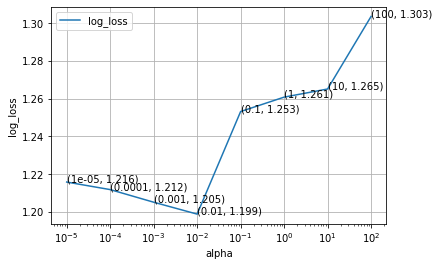

In [0]:
plt.plot(alpha,cv_log_loss, label='log_loss')
for i ,j in enumerate(cv_log_loss):
    plt.annotate((alpha[i], np.round(j,3)), (alpha[i], j))

plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('log_loss')
plt.legend()
plt.grid()
plt.show()

### 6.3 Modelling by Best Hyperparameter

In [0]:

best_alpha = alpha[np.argmin(cv_log_loss)]
clf = MultinomialNB(alpha=best_alpha)
clf.fit(train_x_tfidf_encoding, train_y)
calib_clf = CalibratedClassifierCV(clf, method="sigmoid")
calib_clf.fit(train_x_tfidf_encoding, train_y)


predict_y = calib_clf.predict_proba(train_x_tfidf_encoding)
print('For values of best alpha = ', best_alpha, "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = calib_clf.predict_proba(cv_x_tfidf_encoding)
print('For values of best alpha = ', best_alpha, "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = calib_clf.predict_proba(test_x_tfidf_encoding)
print('For values of best alpha = ', best_alpha, "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


For values of best alpha =  0.01 The train log loss is: 0.6006480472453206
For values of best alpha =  0.01 The cross validation log loss is: 1.1987991466611854
For values of best alpha =  0.01 The test log loss is: 1.1905633414143235


In [0]:
print('The number of misclassified points', np.count_nonzero(calib_clf.predict(cv_x_tfidf_encoding)- y_cv))
print('The percentage of misclassified points', np.count_nonzero(calib_clf.predict(cv_x_tfidf_encoding)- y_cv)/y_cv.shape[0])

The number of misclassified points 194
The percentage of misclassified points 0.36466165413533835


### 6.4 Plotting the confusion matrix

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


==================== Confusion Matrix ====================


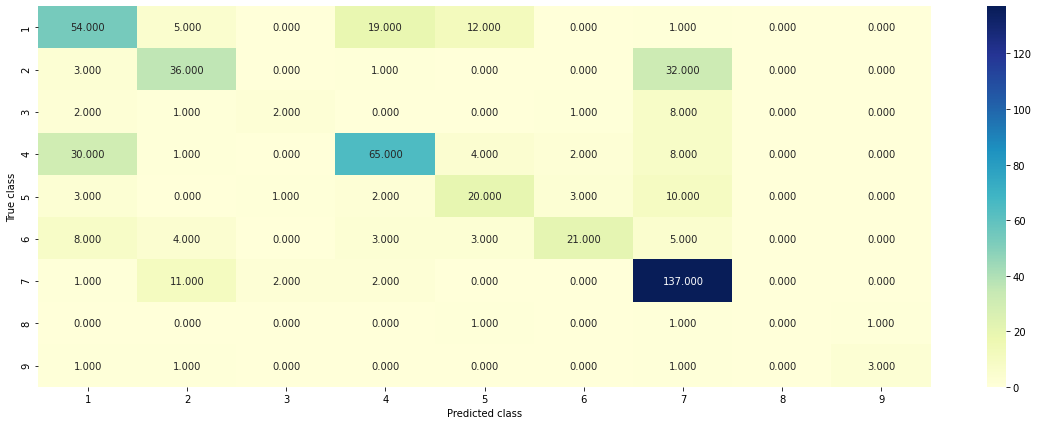

==================== Precision Matrix ====================


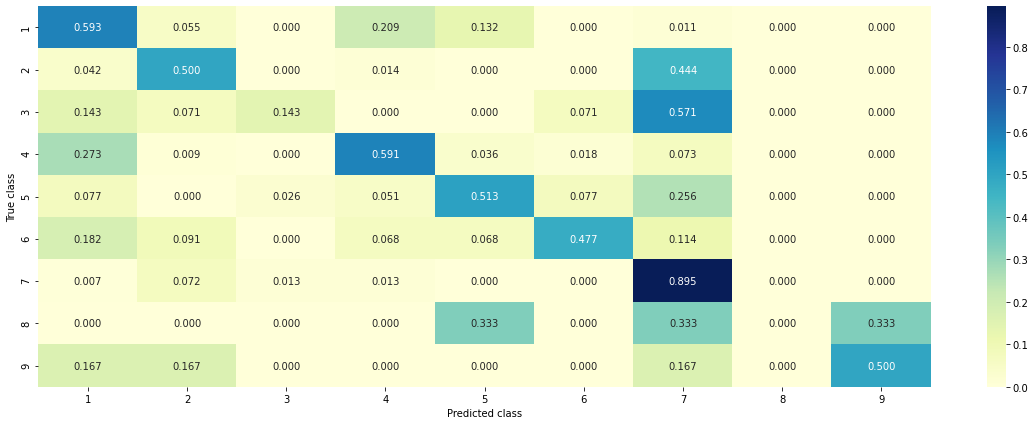

==================== Recall Matrix ====================


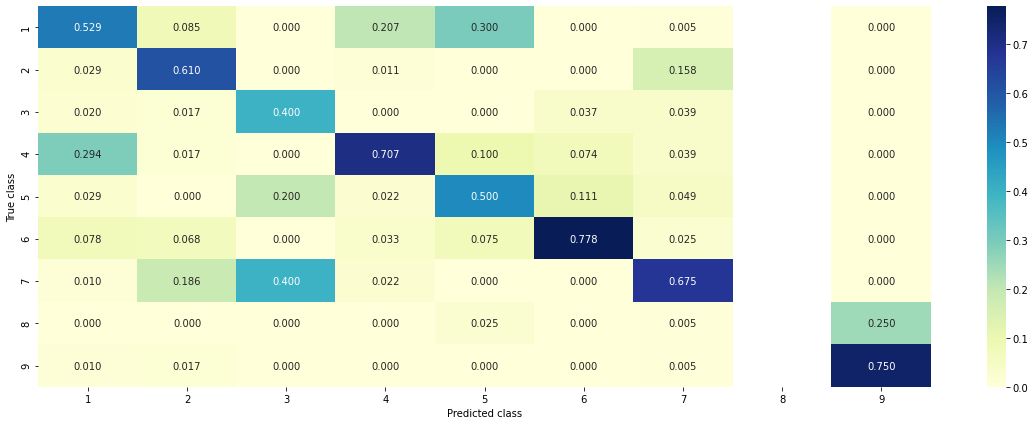

In [0]:
plot_confusion_matrix(y_cv, calib_clf.predict(cv_x_tfidf_encoding.toarray()))

### 6.5 Finding feature importance for naive bayes model

In [0]:
def get_imp_feature_names(indices, text, gene, var, no_feature):
    gene_count_vec = CountVectorizer()
    var_count_vec = CountVectorizer()
    text_count_vec = CountVectorizer()

    gene_vec = gene_count_vec.fit_transform(train_df['Gene'])
    var_vec = var_count_vec.fit_transform(train_df['Variation'])
    text_vec = text_count_vec.fit_transform(train_df['Text'])

    fea1_len = len(gene_count_vec.get_feature_names())
    print(fea1_len)
    fea2_len = len(var_count_vec.get_feature_names())
    print(fea2_len)

    word_present = 0
    for i,v in enumerate(indices):
        if v <fea1_len:
            word = gene_count_vec.get_feature_names()[v]
            #print('Word={} and gene={}'.format(word, gene))
            if word == gene:
                word_present += 1
                print(i, 'Gene feature [{}] present in test data point'.format(word))

        elif (v< fea1_len+fea2_len):
            word = var_count_vec.get_feature_names()[v-(fea1_len)]
            #print('Word={} and variation={}'.format(word, var))
            if word == var:
                word_present += 1
                print(i, 'Variation feature [{}] present in test data point'.format(word))
        
        else:
            word = text_count_vec.get_feature_names()[v-(fea1_len+fea2_len)]
            #print('Word={} and text={}'.format(word, text.split()))
            if word in text.split():
                word_present += 1
                print(i, 'Text feature [{}] present in test data point'.format(word))

In [0]:
test_point_index = 234
no_feature = 100
predicted_cls = calib_clf.predict(test_x_tfidf_encoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(calib_clf.predict_proba(test_x_tfidf_encoding[test_point_index]),4))
print("Actual Class :", y_test[test_point_index])

indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:, :no_feature]
get_imp_feature_names(indices[0], test_df['Text'].iloc[test_point_index], test_df['Gene'].iloc[test_point_index], test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 2
Predicted Class Probabilities: [[0.0719 0.651  0.0218 0.0788 0.0433 0.0422 0.0807 0.0061 0.0042]]
Actual Class : 7
233
1957


# 7. Model- 5: KNN (with train_x_response_encoding)
- We didn't use tfidf because the dimension is high for KNN

In [0]:
#2. stacking the response encoded features
train_gene_var_response_encoding = np.hstack((train_resp_encoded_gene, train_resp_encoded_var))
test_gene_var_response_encoding =np.hstack((test_resp_encoded_gene, test_resp_encoded_var))
cv_gene_var_response_encoding = np.hstack((cv_resp_encoded_gene, cv_resp_encoded_var))

train_x_response_encoding = np.hstack((train_gene_var_response_encoding, train_text_response_encoding))
test_x_response_encoding = np.hstack((test_gene_var_response_encoding, test_text_response_encoding))
cv_x_response_encoding = np.hstack((cv_gene_var_response_encoding, cv_text_response_encoding))

print(train_x_response_encoding.shape)
print(test_x_response_encoding.shape)
print(cv_x_response_encoding.shape)

(2124, 27)
(665, 27)
(532, 27)


In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss

k = [5, 11, 15, 21, 31, 41, 51, 99]
cv_log_loss = []
for i in k:
    print('for k :',i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(train_x_response_encoding, y_train)
    calib_clf = CalibratedClassifierCV(base_estimator=clf, method='sigmoid')
    calib_clf.fit(train_x_response_encoding, y_train)
    calib_probs = calib_clf.predict_proba(cv_x_response_encoding)
    cv_log_loss.append(log_loss(cv_y, calib_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, calib_probs)) 


for k : 5
Log Loss : 1.2768594958681567
for k : 11
Log Loss : 1.0762205102900022
for k : 15
Log Loss : 1.0191918203687953
for k : 21
Log Loss : 1.0221389855978764
for k : 31
Log Loss : 1.0560390899851062
for k : 41
Log Loss : 1.073996226675621
for k : 51
Log Loss : 1.0825353624528273
for k : 99
Log Loss : 1.126264481973763


In [0]:
print(cv_log_loss)

[1.2768594958681567, 1.0762205102900022, 1.0191918203687953, 1.0221389855978764, 1.0560390899851062, 1.073996226675621, 1.0825353624528273, 1.126264481973763]


### 7.1 Hyperparamter vs Log_loss

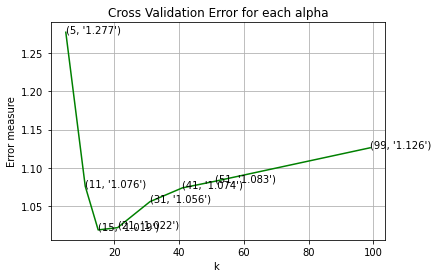

In [0]:
fig, ax = plt.subplots()
ax.plot(k, cv_log_loss,c='g')
for i, txt in enumerate(np.round(cv_log_loss,3)):
    ax.annotate((k[i],str(txt)), (k[i],cv_log_loss[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("k ")
plt.ylabel("Error measure")
plt.show()

### 7.2 Modelling with best hyperparameter

In [0]:
k = [5, 11, 15, 21, 31, 41, 51, 99]
best_k = k[np.argmin(cv_log_loss)]
clf = KNeighborsClassifier(n_neighbors=best_k)
clf.fit(train_x_response_encoding, y_train)
calib_clf = CalibratedClassifierCV(clf, method='sigmoid')
calib_clf.fit(train_x_response_encoding, y_train)

pred_y = calib_clf.predict_proba(train_x_response_encoding)
print('For best k, the training log loss is ', log_loss(y_train, pred_y))
pred_y = calib_clf.predict_proba(cv_x_response_encoding)
print('For best k, the cv log loss is', log_loss(y_cv, pred_y))
pred_y = calib_clf.predict_proba(test_x_response_encoding)
print('For best k, the test log loss is', log_loss(y_test, pred_y))

For best k, the training log loss is  0.511101967977403
For best k, the cv log loss is 1.0191918203687953
For best k, the test log loss is 1.1005023334526427


### 7.3 Plot confusion matrix

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


==================== Confusion Matrix ====================


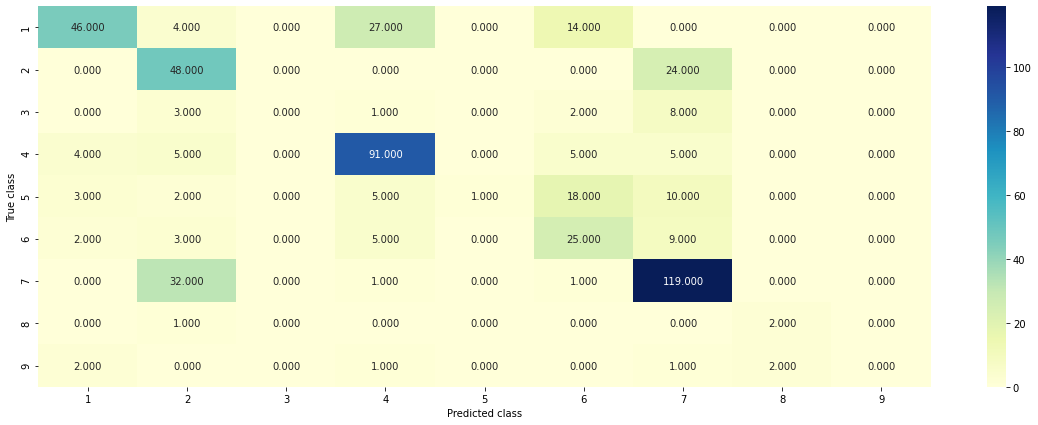

==================== Precision Matrix ====================


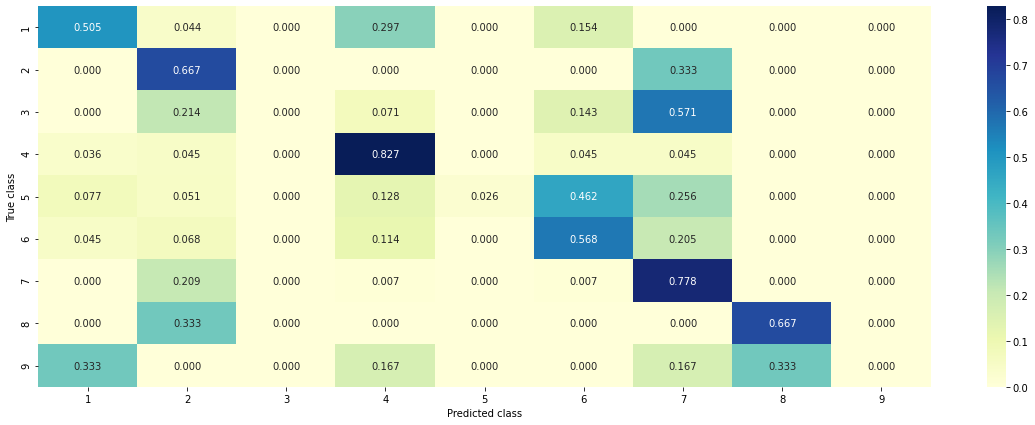

==================== Recall Matrix ====================


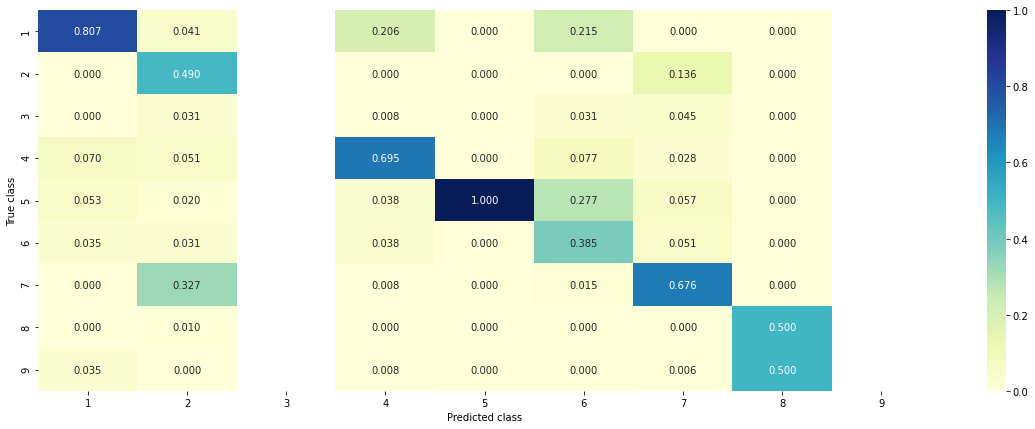

In [0]:
plot_confusion_matrix(y_cv, calib_clf.predict(cv_x_response_encoding))

### 7.4 Test with query point

In [0]:
from collections import Counter

clf = KNeighborsClassifier(n_neighbors=best_k)
clf.fit(train_x_response_encoding, y_train)
calib_clf = CalibratedClassifierCV(clf, method='sigmoid')
calib_clf.fit(train_x_response_encoding, y_train)

test_point_index = 55
predicted_cls = calib_clf.predict(test_x_response_encoding[0].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", y_test[test_point_index])

#best k neighbors of the query point
neighbors = clf.kneighbors(test_x_response_encoding[test_point_index].reshape(1, -1), best_k)
print(neighbors)
print("The ",best_k," nearest neighbours of the test points belongs to classes",y_train[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))

Predicted Class : 2
Actual Class : 1
(array([[0.02271386, 0.02271386, 0.02271386, 0.02271386, 0.02271386,
        0.02640906, 0.02640906, 0.03087767, 0.03087767, 0.03087767,
        0.03087767, 0.03421314, 0.03421314, 0.03421314, 0.03519198]]), array([[1573,  846,  894,  637, 1734,  138,  928, 1771,  374, 1161, 1742,
        1680,  111, 1698,  383]]))
The  15  nearest neighbours of the test points belongs to classes [6 5 6 6 1 6 6 4 1 6 4 6 1 6 6]
Fequency of nearest points : Counter({6: 9, 1: 3, 4: 2, 5: 1})


# 8. Model -6 : Logistic regression (weight='balanced') - train_x_tfidf_encoding

In [0]:
from sklearn.linear_model import SGDClassifier
alpha = [10 ** x for x in range(-6, 3)]
cv_log_loss = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_tfidf_encoding, y_train)
    calib_clf = CalibratedClassifierCV(clf, method="sigmoid")
    calib_clf.fit(train_x_tfidf_encoding, y_train)
    calib_clf_probs = calib_clf.predict_proba(cv_x_tfidf_encoding)
    cv_log_loss.append(log_loss(y_cv, calib_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_cv, calib_clf_probs)) 

for alpha = 1e-06
Log Loss : 1.1742549771890778
for alpha = 1e-05
Log Loss : 1.037824470193025
for alpha = 0.0001
Log Loss : 0.988803984229095
for alpha = 0.001
Log Loss : 1.045347939268924
for alpha = 0.01
Log Loss : 1.2054136330887302
for alpha = 0.1
Log Loss : 1.42253403677547
for alpha = 1
Log Loss : 1.5074946484165994
for alpha = 10
Log Loss : 1.5194469098898684
for alpha = 100
Log Loss : 1.5208920189629667


In [0]:
print(cv_log_loss)

[1.1742549771890778, 1.037824470193025, 0.988803984229095, 1.045347939268924, 1.2054136330887302, 1.42253403677547, 1.5074946484165994, 1.5194469098898684, 1.5208920189629667]


### 8.1 Hyperparameter vs Log loss

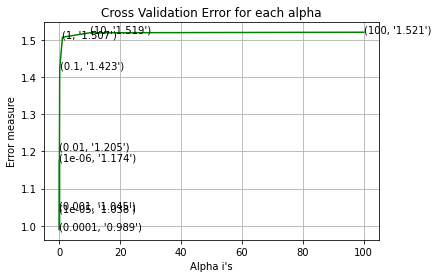

In [0]:
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_loss,c='g')
for i, txt in enumerate(np.round(cv_log_loss,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_loss[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


### 8.3 Modelling with best hyperparameter

In [0]:
from sklearn.metrics import log_loss
alpha = [10 ** x for x in range(-6, 3)]
best_alpha = alpha[np.argmin(cv_log_loss)]
clf = SGDClassifier(class_weight='balanced', alpha=best_alpha, penalty='l2', loss='log', random_state=42)
clf.fit(train_x_tfidf_encoding, train_y)
calib_clf = CalibratedClassifierCV(clf, method="sigmoid")
calib_clf.fit(train_x_tfidf_encoding, train_y)


predict_y = calib_clf.predict_proba(train_x_tfidf_encoding)
print('For values of best alpha = {} The train log loss is {}'.format(best_alpha, log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15)))
predict_y = calib_clf.predict_proba(cv_x_tfidf_encoding)
print('For values of best alpha = ', best_alpha, "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = calib_clf.predict_proba(test_x_tfidf_encoding)
print('For values of best alpha = ', best_alpha, "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

0.0001
For values of best alpha = 0.0001 The train log loss is 0.3628054846278603
For values of best alpha =  0.0001 The cross validation log loss is: 0.988803984229095
For values of best alpha =  0.0001 The test log loss is: 0.992953533306879


### 8.4 Plot confusion matrix

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


==================== Confusion Matrix ====================


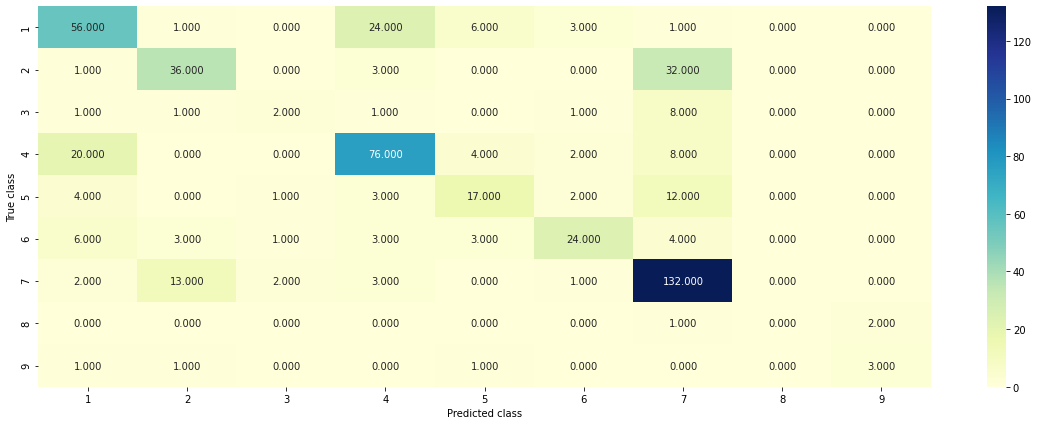

==================== Precision Matrix ====================


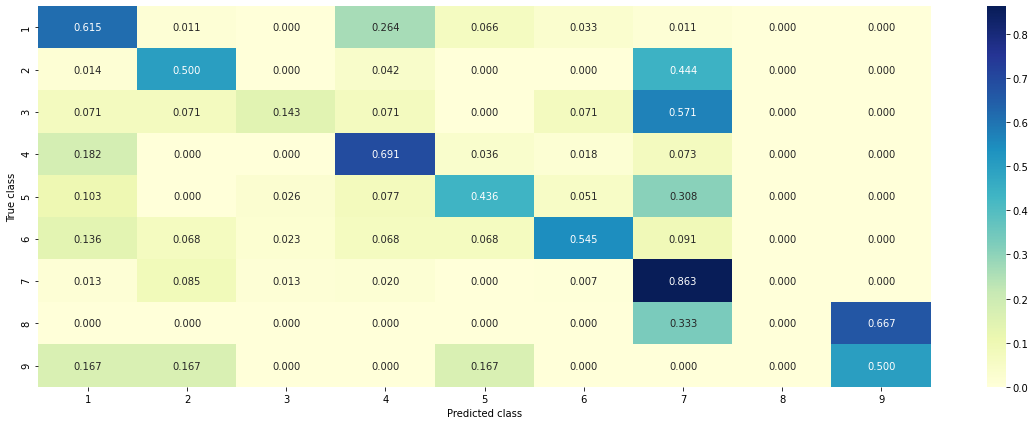

==================== Recall Matrix ====================


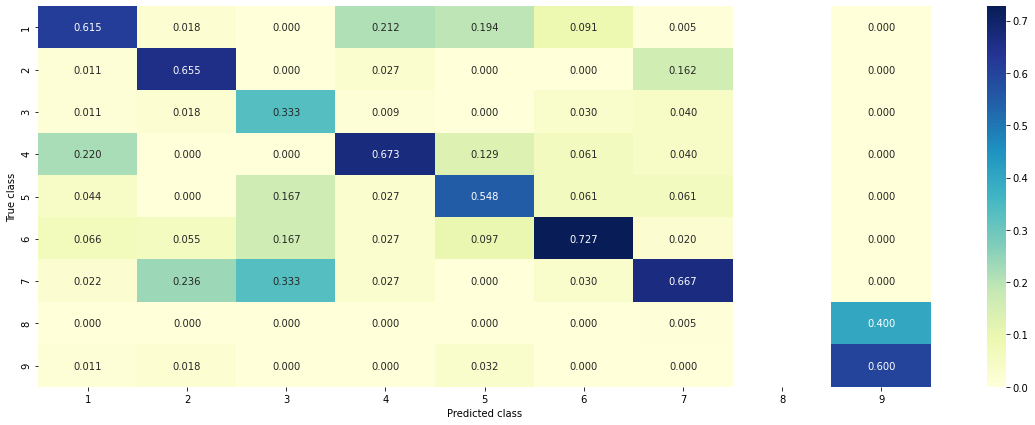

In [0]:
plot_confusion_matrix(y_cv, calib_clf.predict(cv_x_tfidf_encoding))

### 8.5 Feature Importance

In [0]:
# from tabulate import tabulate
clf = SGDClassifier(class_weight='balanced', alpha=best_alpha, penalty='l2', loss='log', random_state=42)
clf.fit(train_x_tfidf_encoding,y_train)
test_point_index = 1
no_feature = 500
predicted_cls = sig_clf.predict(test_x_tfidf_encoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_tfidf_encoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_imp_feature_names(indices[0], test_df['Text'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.1358 0.1574 0.0256 0.1492 0.0686 0.0711 0.3846 0.005  0.0027]]
Actual Class : 2
--------------------------------------------------
233
1957
10 Text feature [egfr] present in test data point
15 Text feature [variants] present in test data point
19 Text feature [mutations] present in test data point
24 Text feature [cells] present in test data point
67 Text feature [flt3] present in test data point
70 Text feature [activation] present in test data point
80 Text feature [crizotinib] present in test data point
120 Text feature [pten] present in test data point
133 Text feature [lung] present in test data point
141 Text feature [signaling] present in test data point
181 Text feature [imatinib] present in test data point
209 Text feature [kit] present in test data point
222 Text feature [mek] present in test data point
254 Text feature [map2k1] present in test data point
286 Text feature [fig] present in test data point
297 Text feature 

# 9. Model - 7 - Logistic Regression (without class balancing) - train_x_tfidf_encoding

In [0]:
from sklearn.linear_model import SGDClassifier
alpha = [10 ** x for x in range(-6, 3)]
cv_log_loss = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier( alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_tfidf_encoding, y_train)
    calib_clf = CalibratedClassifierCV(clf, method="sigmoid")
    calib_clf.fit(train_x_tfidf_encoding, y_train)
    calib_clf_probs = calib_clf.predict_proba(cv_x_tfidf_encoding)
    cv_log_loss.append(log_loss(y_cv, calib_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_cv, calib_clf_probs)) 

for alpha = 1e-06
Log Loss : 1.1734038398623992
for alpha = 1e-05
Log Loss : 1.0411841617020752
for alpha = 0.0001
Log Loss : 0.9866696887483679
for alpha = 0.001
Log Loss : 1.0388274907959043
for alpha = 0.01
Log Loss : 1.2013904156678463
for alpha = 0.1
Log Loss : 1.3831786855488195
for alpha = 1
Log Loss : 1.45893928248103
for alpha = 10
Log Loss : 1.4691107646079185
for alpha = 100
Log Loss : 1.470339043238509


In [0]:
print(cv_log_loss)

[1.1734038398623992, 1.0411841617020752, 0.9866696887483679, 1.0388274907959043, 1.2013904156678463, 1.3831786855488195, 1.45893928248103, 1.4691107646079185, 1.470339043238509]


### 9.1 Hyperparameter vs log loss

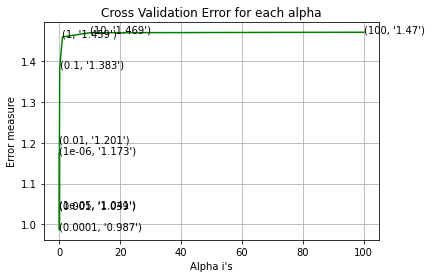

In [0]:
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_loss,c='g')
for i, txt in enumerate(np.round(cv_log_loss,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_loss[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


### 9.2 Modelling with best hyperparameter

In [0]:

best_alpha = alpha[np.argmin(cv_log_loss)]
clf = SGDClassifier( alpha=best_alpha, penalty='l2', loss='log', random_state=42)
clf.fit(train_x_tfidf_encoding, train_y)
calib_clf = CalibratedClassifierCV(clf, method="sigmoid")
calib_clf.fit(train_x_tfidf_encoding, train_y)

predict_y = calib_clf.predict_proba(train_x_tfidf_encoding)
print('For values of best alpha = ', best_alpha, "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = calib_clf.predict_proba(cv_x_tfidf_encoding)
print('For values of best alpha = ', best_alpha, "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = calib_clf.predict_proba(test_x_tfidf_encoding)
print('For values of best alpha = ', best_alpha, "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

For values of best alpha =  0.0001 The train log loss is: 0.35020067282059286
For values of best alpha =  0.0001 The cross validation log loss is: 0.9866696887483679
For values of best alpha =  0.0001 The test log loss is: 0.9900913247632257


### 9.3 Plotting confusion matrix

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


==================== Confusion Matrix ====================


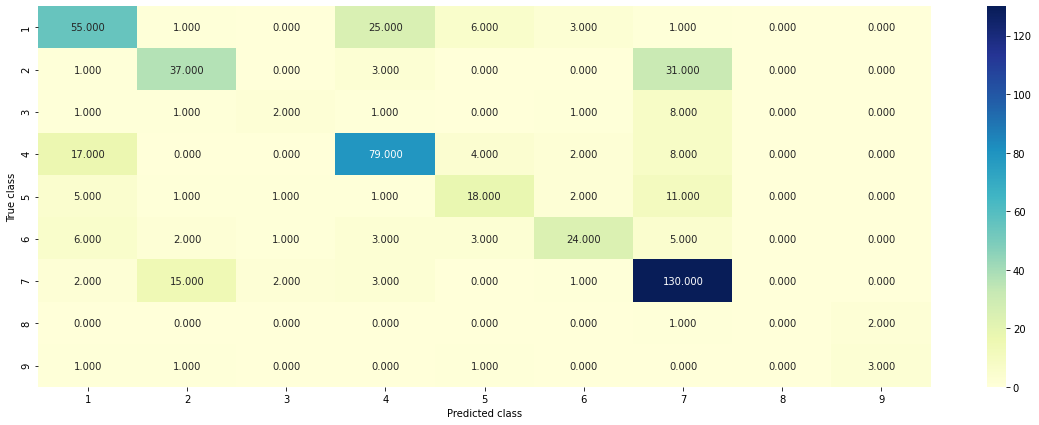

==================== Precision Matrix ====================


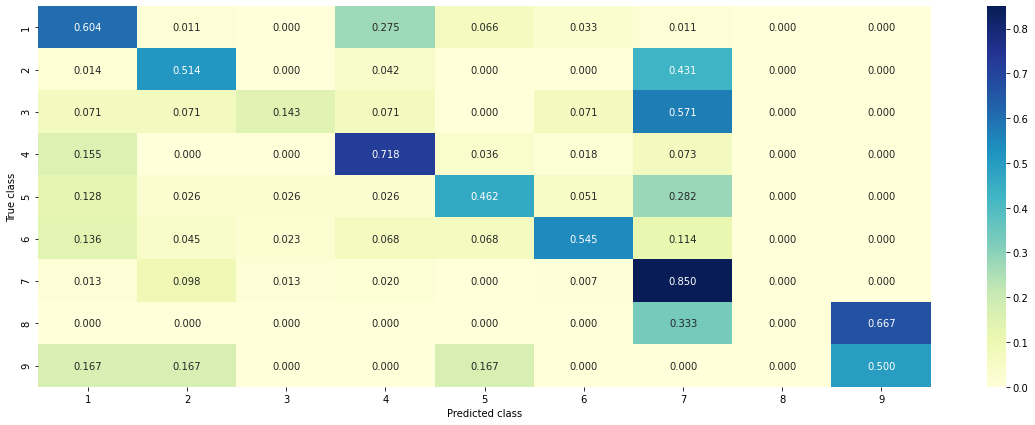

==================== Recall Matrix ====================


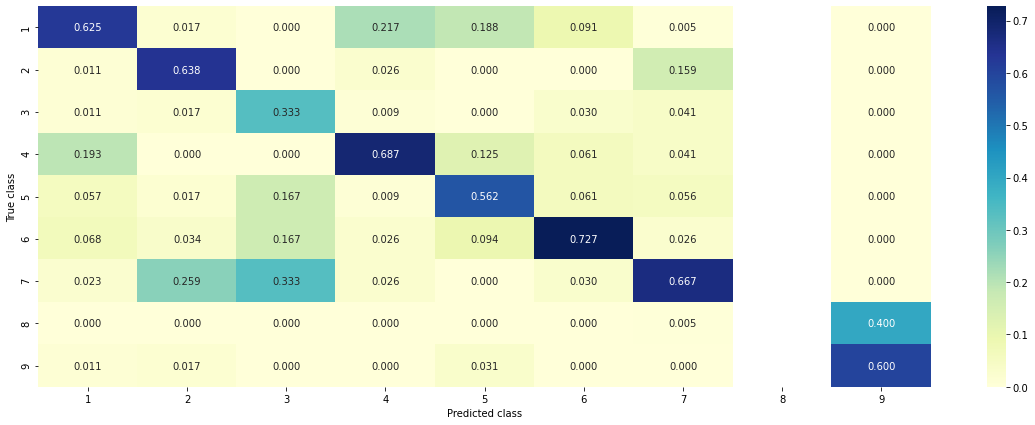

In [0]:
plot_confusion_matrix(y_cv, calib_clf.predict(cv_x_tfidf_encoding))

### 9.4 Feature importance

In [0]:
# from tabulate import tabulate
clf = SGDClassifier( alpha=best_alpha, penalty='l2', loss='log', random_state=42)
clf.fit(train_x_tfidf_encoding,y_train)
test_point_index = 1
no_feature = 500
predicted_cls = sig_clf.predict(test_x_tfidf_encoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_tfidf_encoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_imp_feature_names(indices[0], test_df['Text'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.1358 0.1574 0.0256 0.1492 0.0686 0.0711 0.3846 0.005  0.0027]]
Actual Class : 2
--------------------------------------------------
233
1957
16 Text feature [egfr] present in test data point
18 Text feature [cells] present in test data point
36 Text feature [variants] present in test data point
63 Text feature [mutations] present in test data point
118 Text feature [activation] present in test data point
152 Text feature [crizotinib] present in test data point
153 Text feature [flt3] present in test data point
178 Text feature [lung] present in test data point
182 Text feature [signaling] present in test data point
229 Text feature [mek] present in test data point
267 Text feature [kit] present in test data point
279 Text feature [imatinib] present in test data point
289 Text feature [fig] present in test data point
323 Text feature [pten] present in test data point
340 Text feature [expressing] present in test data point
342 Text f

# 10. Model - 8 : Linear SVM - train_x_tfidf_encoding

In [0]:
from sklearn.linear_model import SGDClassifier
alpha = [10 ** x for x in range(-5, 3)]
cv_log_loss = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_x_tfidf_encoding, y_train)
    calib_clf = CalibratedClassifierCV(clf, method="sigmoid")
    calib_clf.fit(train_x_tfidf_encoding, y_train)
    calib_clf_probs = calib_clf.predict_proba(cv_x_tfidf_encoding)
    cv_log_loss.append(log_loss(y_cv, calib_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_cv, calib_clf_probs)) 

for alpha = 1e-05
Log Loss : 1.1267116833009485
for alpha = 0.0001
Log Loss : 1.043485291546838
for alpha = 0.001
Log Loss : 1.1061575737237486
for alpha = 0.01
Log Loss : 1.2610585092354822
for alpha = 0.1
Log Loss : 1.4488567359227804
for alpha = 1
Log Loss : 1.5213187528692298
for alpha = 10
Log Loss : 1.5213187269859398
for alpha = 100
Log Loss : 1.5213187004604067


In [0]:
print(cv_log_loss)

[1.1267116833009485, 1.043485291546838, 1.1061575737237486, 1.2610585092354822, 1.4488567359227804, 1.5213187528692298, 1.5213187269859398, 1.5213187004604067]


### 10.1 Hyperparameter vs log loss

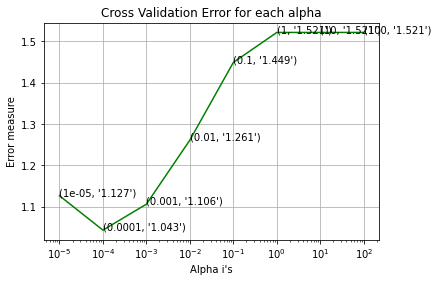

In [0]:
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_loss,c='g')
for i, txt in enumerate(np.round(cv_log_loss,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_loss[i]))
plt.xscale('log')
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


### 10.2 Modelling with best hyperparameter

In [0]:
alpha = [10 ** x for x in range(-5, 3)]
best_alpha = alpha[np.argmin(cv_log_loss)]
clf = SGDClassifier( class_weight='balanced', alpha=best_alpha, penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_tfidf_encoding, train_y)
calib_clf = CalibratedClassifierCV(clf, method="sigmoid")
calib_clf.fit(train_x_tfidf_encoding, train_y)

predict_y = calib_clf.predict_proba(train_x_tfidf_encoding)
print('For values of best alpha = ', best_alpha, "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = calib_clf.predict_proba(cv_x_tfidf_encoding)
print('For values of best alpha = ', best_alpha, "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = calib_clf.predict_proba(test_x_tfidf_encoding)
print('For values of best alpha = ', best_alpha, "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

For values of best alpha =  0.0001 The train log loss is: 0.3198764378315532
For values of best alpha =  0.0001 The cross validation log loss is: 1.043485291546838
For values of best alpha =  0.0001 The test log loss is: 1.0354939437535404


### 10.3 Plotting confusion matrix

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


==================== Confusion Matrix ====================


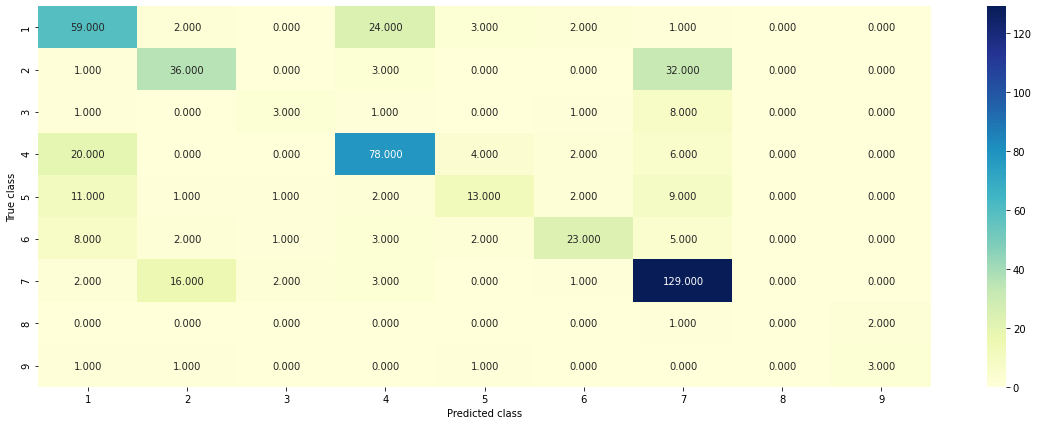

==================== Precision Matrix ====================


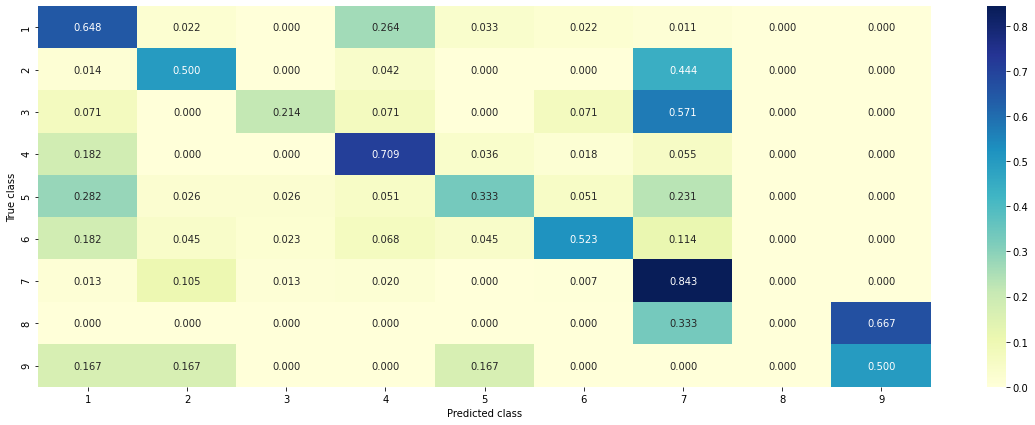

==================== Recall Matrix ====================


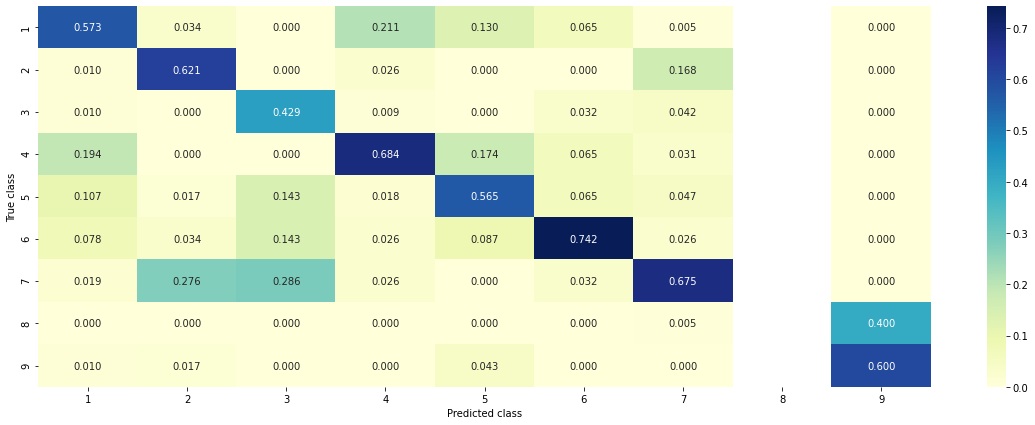

In [0]:
plot_confusion_matrix(y_cv, calib_clf.predict(cv_x_tfidf_encoding))

### 10.4 Feature importance

In [0]:
def get_imp_feature_names(indices, text, gene, var, no_feature):
    gene_count_vec = CountVectorizer()
    var_count_vec = CountVectorizer()
    text_count_vec = CountVectorizer()

    gene_vec = gene_count_vec.fit_transform(train_df['Gene'])
    var_vec = var_count_vec.fit_transform(train_df['Variation'])
    text_vec = text_count_vec.fit_transform(train_df['Text'])

    fea1_len = len(gene_vec.get_feature_names())
    fea2_len = len(var_vec.get_feature_names())

    word_present = 0
    for i,v in enumerate(indices):
        if v <fea1_len:
            word = gene_vec.get_feature_names()[v]
            if word == gene:
                word_present += 1
                print(i, 'Gene feature [{}] present in test data point'.format(word))

        elif (v< fea1_len+fea2_len):
            word = var_vec.get_feature_names()[v - fea1_len]
            if word == var:
                word_present += 1
                print(i, 'Variation feature [{}] present in test data point'.format(word))
        
        else:
            word = text_vec.get_feature_names()[v - (fea1_len+fea2_len)]
            if word in text.split():
                word_present += 1
                print(i, 'Text feature [{}] present in test data point'.format(word))

In [0]:
clf = SGDClassifier(alpha=best_alpha, penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_tfidf_encoding,train_y)
test_point_index = 1
# test_point_index = 100
no_feature = 500
predicted_cls = calib_clf.predict(test_x_tfidf_encoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_tfidf_encoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_imp_feature_names(indices[0], test_df['Text'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.1358 0.1574 0.0256 0.1492 0.0686 0.0711 0.3846 0.005  0.0027]]
Actual Class : 2
--------------------------------------------------
233
1957
44 Text feature [cells] present in test data point
90 Text feature [crizotinib] present in test data point
92 Text feature [pik3ca] present in test data point
93 Text feature [egfr] present in test data point
238 Text feature [mek] present in test data point
253 Text feature [signaling] present in test data point
256 Text feature [lung] present in test data point
354 Text feature [fig] present in test data point
355 Text feature [activation] present in test data point
361 Text feature [flt3] present in test data point
366 Text feature [expressing] present in test data point
367 Text feature [ba] present in test data point
371 Text feature [mutations] present in test data point
372 Text feature [cancers] present in test data point
376 Text feature [afatinib] present in test data point
381 Text f

# 11. Model -9 : Random Forest - train_x_tfidf_encoding

In [0]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = [100,200,500,1000,2000]
max_depth = [5,10]

cv_log_loss = []
for i in n_estimators:
    for j in max_depth:
        print("for n_estimators:{} and max_depth:{}".format(i, j))
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_tfidf_encoding, y_train)
        calib_clf = CalibratedClassifierCV(clf, method="sigmoid")
        calib_clf.fit(train_x_tfidf_encoding, y_train)
        calib_clf_probs = calib_clf.predict_proba(cv_x_tfidf_encoding)
        cv_log_loss.append(log_loss(y_cv, calib_clf_probs, labels=clf.classes_, eps=1e-15))
        # to avoid rounding error while multiplying probabilites we use log-probability estimates
        print("Log Loss :",log_loss(y_cv, calib_clf_probs)) 

for n_estimators:100 and max_depth:5
Log Loss : 1.1988005001744617
for n_estimators:100 and max_depth:10
Log Loss : 1.1187645622784195
for n_estimators:200 and max_depth:5
Log Loss : 1.1933900768945447
for n_estimators:200 and max_depth:10
Log Loss : 1.112707859312027
for n_estimators:500 and max_depth:5
Log Loss : 1.1865070175584427
for n_estimators:500 and max_depth:10
Log Loss : 1.1109644399576688
for n_estimators:1000 and max_depth:5
Log Loss : 1.185097551647655
for n_estimators:1000 and max_depth:10
Log Loss : 1.1108390988421164
for n_estimators:2000 and max_depth:5
Log Loss : 1.1837526919487031
for n_estimators:2000 and max_depth:10
Log Loss : 1.1092461775860962


In [0]:
print(cv_log_loss)

[1.1988005001744617, 1.1187645622784195, 1.1933900768945447, 1.112707859312027, 1.1865070175584427, 1.1109644399576688, 1.185097551647655, 1.1108390988421164, 1.1837526919487031, 1.1092461775860962]


### 11.1 Modelling with best hyperparameter

In [0]:
best_n_estimator = n_estimators[int(np.argmin(cv_log_loss)/2)]
best_max_depth = max_depth[int(np.argmin(cv_log_loss)%2)]

clf = RandomForestClassifier(n_estimators=best_n_estimator, criterion='gini', max_depth=best_max_depth, random_state=42, n_jobs=-1)
clf.fit(train_x_tfidf_encoding, train_y)
calib_clf = CalibratedClassifierCV(clf, method="sigmoid")
calib_clf.fit(train_x_tfidf_encoding, train_y)

predict_y = calib_clf.predict_proba(train_x_tfidf_encoding)
print('For values of best estimator = ', best_n_estimator, 'and the best_max_depth=',best_max_depth,"The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = calib_clf.predict_proba(cv_x_tfidf_encoding)
print('For values of best estimator = ', best_n_estimator, 'and the best_max_depth=',best_max_depth, "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = calib_clf.predict_proba(test_x_tfidf_encoding)
print('For values of best estimator = ', best_n_estimator, 'and the best_max_depth=',best_max_depth, "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

For values of best estimator =  2000 and the best_max_depth= 10 The train log loss is: 0.6526454167079124
For values of best estimator =  2000 and the best_max_depth= 10 The cross validation log loss is: 1.112707859312027
For values of best estimator =  2000 and the best_max_depth= 10 The test log loss is: 1.1137498099271714


### 11.2 Plotting confusion matrix

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


==================== Confusion Matrix ====================


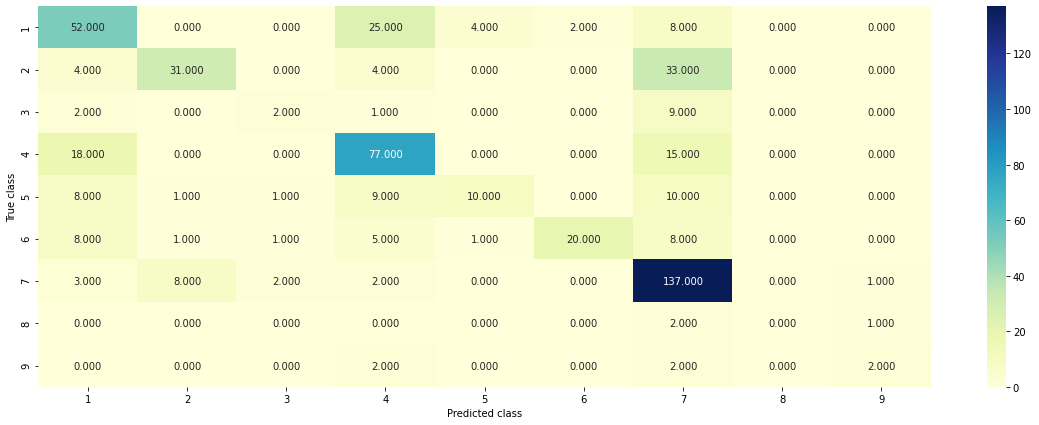

==================== Precision Matrix ====================


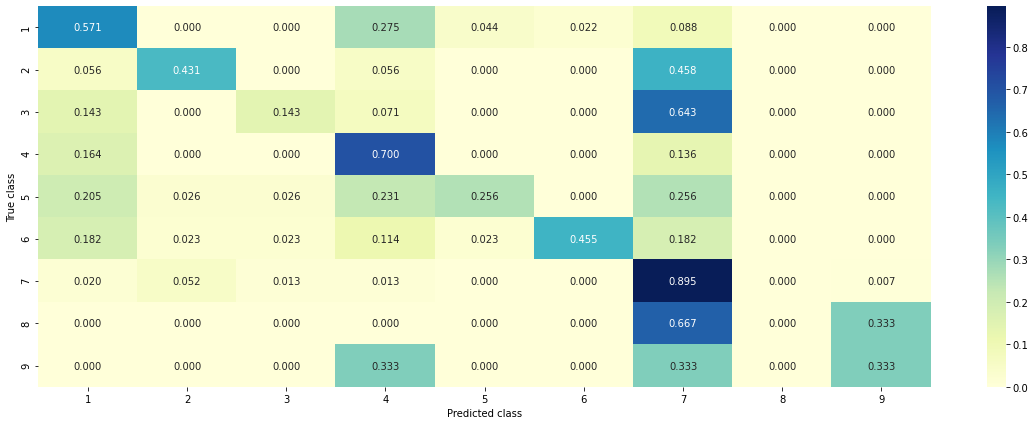

==================== Recall Matrix ====================


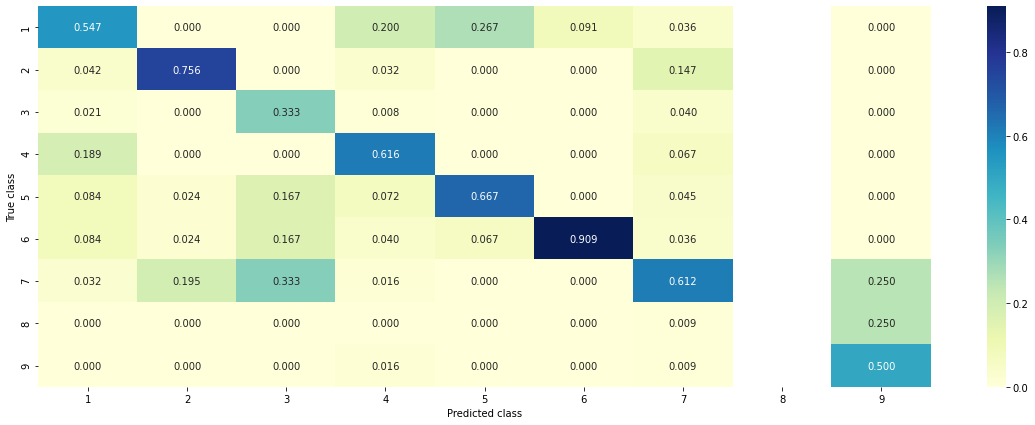

In [0]:
plot_confusion_matrix(y_cv, calib_clf.predict(cv_x_tfidf_encoding))

### 11.3 Feature importance

In [0]:
test_point_index = 46

clf = RandomForestClassifier(n_estimators=best_n_estimator, criterion='gini', max_depth=best_max_depth, random_state=42, n_jobs=-1)
clf.fit(train_x_tfidf_encoding, train_y)
calib_clf = CalibratedClassifierCV(clf, method="sigmoid")
calib_clf.fit(train_x_tfidf_encoding, train_y)

print('Actual class of the test point', y_test[test_point_index])
print('predicted class of the test point', calib_clf.predict(test_x_tfidf_encoding[test_point_index].reshape(1,-1)))
print('Predicted probs of the test point', calib_clf.predict_proba(test_x_tfidf_encoding[test_point_index].reshape(1,-1)))

indices = np.argsort(-clf.feature_importances_)
for i in indices:
    if i<9:
        print('Gene feature of index {} is important'.format(i))
    elif i>9 and i<19:
        print('Variation feature of index {} is important'.format(i))
    elif i>18:
        print('Text feature of index {} is important'.format(i))

## Note: The output is cleared for 11.3

# 12. Model -10 : Random Forest - train_x_response_encoding

In [0]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = [100,200,500,1000,2000]
max_depth = [5,10]

cv_log_loss = []
for i in n_estimators:
    for j in max_depth:
        print("for n_estimators:{} and max_depth:{}".format(i, j))
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_response_encoding, y_train)
        calib_clf = CalibratedClassifierCV(clf, method="sigmoid")
        calib_clf.fit(train_x_response_encoding, y_train)
        calib_clf_probs = calib_clf.predict_proba(cv_x_response_encoding)
        cv_log_loss.append(log_loss(y_cv, calib_clf_probs, labels=clf.classes_, eps=1e-15))
        # to avoid rounding error while multiplying probabilites we use log-probability estimates
        print("Log Loss :",log_loss(y_cv, calib_clf_probs)) 

for n_estimators:100 and max_depth:5
Log Loss : 1.2673687545275323
for n_estimators:100 and max_depth:10
Log Loss : 1.7852535970999268
for n_estimators:200 and max_depth:5
Log Loss : 1.2462988258334065
for n_estimators:200 and max_depth:10
Log Loss : 1.7256337274708426
for n_estimators:500 and max_depth:5
Log Loss : 1.2620970848601218
for n_estimators:500 and max_depth:10
Log Loss : 1.7333980341545805
for n_estimators:1000 and max_depth:5
Log Loss : 1.2939719653709423
for n_estimators:1000 and max_depth:10
Log Loss : 1.7361283090640731
for n_estimators:2000 and max_depth:5
Log Loss : 1.3179801271803615
for n_estimators:2000 and max_depth:10
Log Loss : 1.750424455247399


In [0]:
print(cv_log_loss)

[1.2673687545275323, 1.7852535970999268, 1.2462988258334065, 1.7256337274708426, 1.2620970848601218, 1.7333980341545805, 1.2939719653709423, 1.7361283090640731, 1.3179801271803615, 1.750424455247399]


### 12.1 Modelling with best hyperparameter

In [0]:
best_n_estimator = n_estimators[int(np.argmin(cv_log_loss)/2)]
best_max_depth = max_depth[int(np.argmin(cv_log_loss)%2)]

clf = RandomForestClassifier(n_estimators=best_n_estimator, criterion='gini', max_depth=best_max_depth, random_state=42, n_jobs=-1)
clf.fit(train_x_response_encoding, train_y)
calib_clf = CalibratedClassifierCV(clf, method="sigmoid")
calib_clf.fit(train_x_response_encoding, train_y)

predict_y = calib_clf.predict_proba(train_x_response_encoding)
print('For values of best estimator = ', best_n_estimator, 'and the best_max_depth=',best_max_depth,"The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = calib_clf.predict_proba(cv_x_response_encoding)
print('For values of best estimator = ', best_n_estimator, 'and the best_max_depth=',best_max_depth, "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = calib_clf.predict_proba(test_x_response_encoding)
print('For values of best estimator = ', best_n_estimator, 'and the best_max_depth=',best_max_depth, "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

For values of best estimator =  200 and the best_max_depth= 5 The train log loss is: 0.06005210502399388
For values of best estimator =  200 and the best_max_depth= 5 The cross validation log loss is: 1.2462988258334065
For values of best estimator =  200 and the best_max_depth= 5 The test log loss is: 1.2369762215265632


### 12.2 Plotting confusion matrix

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


==================== Confusion Matrix ====================


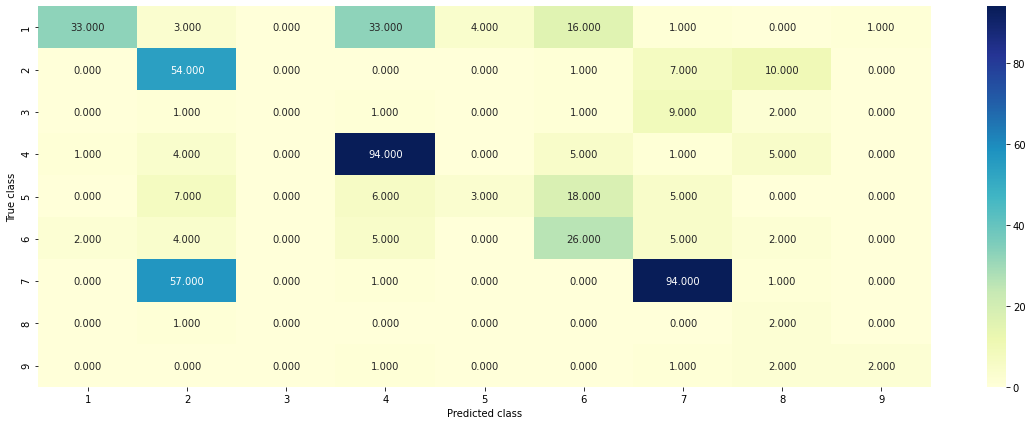

==================== Precision Matrix ====================


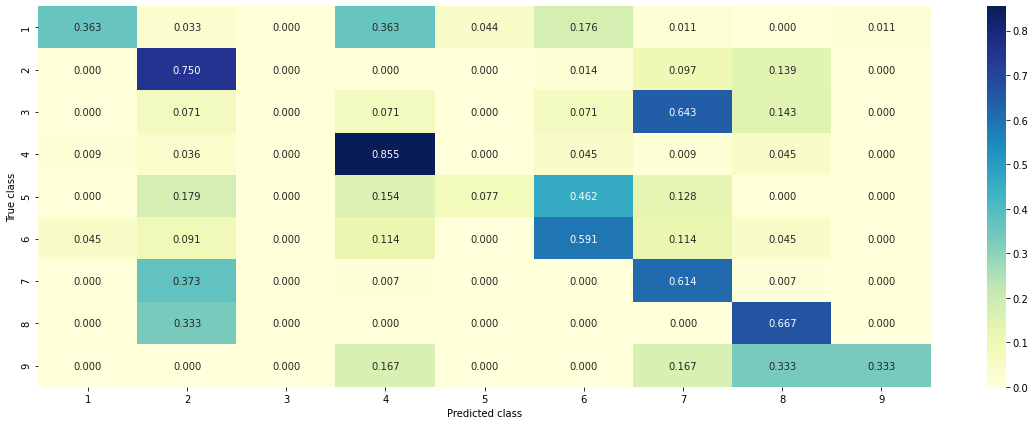

==================== Recall Matrix ====================


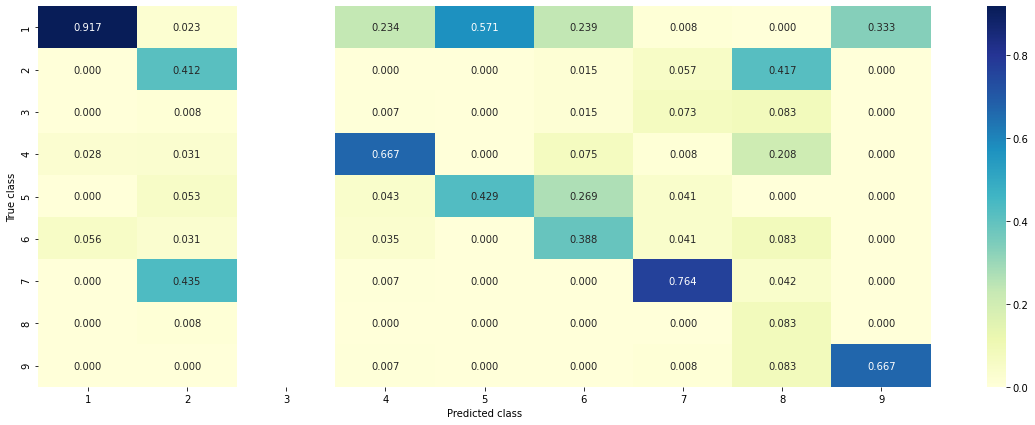

In [0]:
plot_confusion_matrix(y_cv, calib_clf.predict(cv_x_response_encoding))

### 12.3 Feature Importance

In [0]:
print(clf.feature_importances_)
print(len(clf.feature_importances_))

[0.04111769 0.03137365 0.00466635 0.05067586 0.01214825 0.01795916
 0.07485603 0.00567843 0.00565871 0.1412613  0.10397939 0.01777754
 0.15807019 0.05856116 0.06588619 0.19526175 0.00621418 0.00885417
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]
27


In [0]:
y_test[19]

7

In [0]:
test_point_index = 19

clf = RandomForestClassifier(n_estimators=best_n_estimator, criterion='gini', max_depth=best_max_depth, random_state=42, n_jobs=-1)
clf.fit(train_x_response_encoding, train_y)
calib_clf = CalibratedClassifierCV(clf, method="sigmoid")
calib_clf.fit(train_x_response_encoding, train_y)

print('Actual class of this point:',y_test[test_point_index])
print('Predicted class of this point:',calib_clf.predict(test_x_response_encoding[test_point_index].reshape(1,-1)))
print('Predicted probs of this point:',calib_clf.predict_proba(test_x_response_encoding[test_point_index].reshape(1,-1)))

#feature importance of this feauture
indices = np.argsort(-clf.feature_importances_)    # sorting the index on the order of decreasing
no_features = 27            # train_x_response_encoding.shape[1]

for i in indices:
    if i<9:
        print('Gene feature of index {} is important'.format(i))

    elif i>9 and i <=18:
        print('Variation feature of index {} is importanct'.format(i))

    elif i>18:
        print('Text feature of index {} is important'.format(i))

Actual class of this point: 7
Predicted class of this point: [2]
Predicted probs of this point: [[0.04037839 0.37275349 0.04227514 0.05228634 0.04896325 0.06352828
  0.13100265 0.17239427 0.07641819]]
Variation feature of index 15 is importanct
Variation feature of index 12 is importanct
Variation feature of index 10 is importanct
Gene feature of index 6 is important
Variation feature of index 14 is importanct
Variation feature of index 13 is importanct
Gene feature of index 3 is important
Gene feature of index 0 is important
Gene feature of index 1 is important
Gene feature of index 5 is important
Variation feature of index 11 is importanct
Gene feature of index 4 is important
Variation feature of index 17 is importanct
Variation feature of index 16 is importanct
Gene feature of index 7 is important
Gene feature of index 8 is important
Gene feature of index 2 is important
Text feature of index 25 is important
Variation feature of index 18 is importanct
Text feature of index 19 is impo

# 13. Model 11: Stacking Classifer- train_x_tfidf_encoding
- Here we are going to stack logistic regression, linear svm, Naive Bayes

In [0]:
from sklearn.naive_bayes import MultinomialNB

#logistic regression
clf_1 = SGDClassifier(alpha=0.001, penalty='l2', loss='log', class_weight='balanced', random_state=42)
clf_1.fit(train_x_tfidf_encoding, y_train)
calib_clf_1 = CalibratedClassifierCV(clf_1, method='sigmoid')
calib_clf_1.fit(train_x_tfidf_encoding, y_train)
print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(cv_y, calib_clf_1.predict_proba(cv_x_tfidf_encoding))))

#SVM
clf_2 = SGDClassifier(alpha=1, penalty='l2', loss='hinge', class_weight='balanced', random_state=42)
clf_2.fit(train_x_tfidf_encoding, y_train)
calib_clf_2 = CalibratedClassifierCV(clf_2, method='sigmoid')
calib_clf_2.fit(train_x_tfidf_encoding, y_train)
print("Support vector machines : Log Loss: %0.2f" % (log_loss(cv_y, calib_clf_2.predict_proba(cv_x_tfidf_encoding))))

#Naive Bayes
clf_3 = MultinomialNB(alpha=0.001)
clf_3.fit(train_x_tfidf_encoding, y_train)
calib_clf_3 = CalibratedClassifierCV(clf_3, method='sigmoid')
calib_clf_3.fit(train_x_tfidf_encoding, y_train)
print("Naive Bayes : Log Loss: %0.2f" % (log_loss(cv_y, calib_clf_3.predict_proba(cv_x_tfidf_encoding))))


Logistic Regression :  Log Loss: 1.05
Support vector machines : Log Loss: 1.52
Naive Bayes : Log Loss: 1.21


### 13.1 Stacking the classifiers

In [0]:
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import StackingClassifier

alpha = [10**x for x in range(-5,1)]
best_alpha = 999

for i in alpha:
    lr = LogisticRegression(C=i)
    stack_clf = StackingClassifier(classifiers=[calib_clf_1, calib_clf_2, calib_clf_3], meta_classifier=lr, use_probas=True)
    stack_clf.fit(train_x_tfidf_encoding, y_train)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(cv_y, stack_clf.predict_proba(cv_x_tfidf_encoding))))
    log_error =log_loss(y_cv, stack_clf.predict_proba(cv_x_tfidf_encoding))
    if best_alpha > log_error:
        best_alpha = log_error
        print('Best Error:',best_alpha)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Stacking Classifer : for the value of alpha: 0.000010 Log Loss: 1.829
Best Error: 1.8290282844606243
Stacking Classifer : for the value of alpha: 0.000100 Log Loss: 1.818
Best Error: 1.8182948159528811
Stacking Classifer : for the value of alpha: 0.001000 Log Loss: 1.724
Best Error: 1.7241626418236866
Stacking Classifer : for the value of alpha: 0.010000 Log Loss: 1.340
Best Error: 1.339549291127965
Stacking Classifer : for the value of alpha: 0.100000 Log Loss: 1.143
Best Error: 1.1428478777328273
Stacking Classifer : for the value of alpha: 1.000000 Log Loss: 1.395


### 13.2 Testing with best HyperParameter

In [0]:
lr = LogisticRegression(C = 0.1) # since log_loss is minimum at alpha=0.1
stack_clf = StackingClassifier(classifiers=[calib_clf_1, calib_clf_2, calib_clf_3], meta_classifier=lr, use_probas=True)
stack_clf.fit(train_x_tfidf_encoding, y_train)

log_error = log_loss(y_train, stack_clf.predict_proba(train_x_tfidf_encoding))
print("Log loss (train) on the stacking classifier :",log_error)

log_error = log_loss(y_cv, stack_clf.predict_proba(cv_x_tfidf_encoding))
print("Log loss (CV) on the stacking classifier :",log_error)

log_error = log_loss(y_test, stack_clf.predict_proba(test_x_tfidf_encoding))
print("Log loss (test) on the stacking classifier :",log_error)

print("Number of missclassified point :", np.count_nonzero((stack_clf.predict(test_x_tfidf_encoding)- y_test))/y_test.shape[0])

Log loss (train) on the stacking classifier : 0.44209300982953115
Log loss (CV) on the stacking classifier : 1.1428478777328273
Log loss (test) on the stacking classifier : 1.168750706290612
Number of missclassified point : 0.37593984962406013


### 13.3 Plot confusion matrix

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


==================== Confusion Matrix ====================


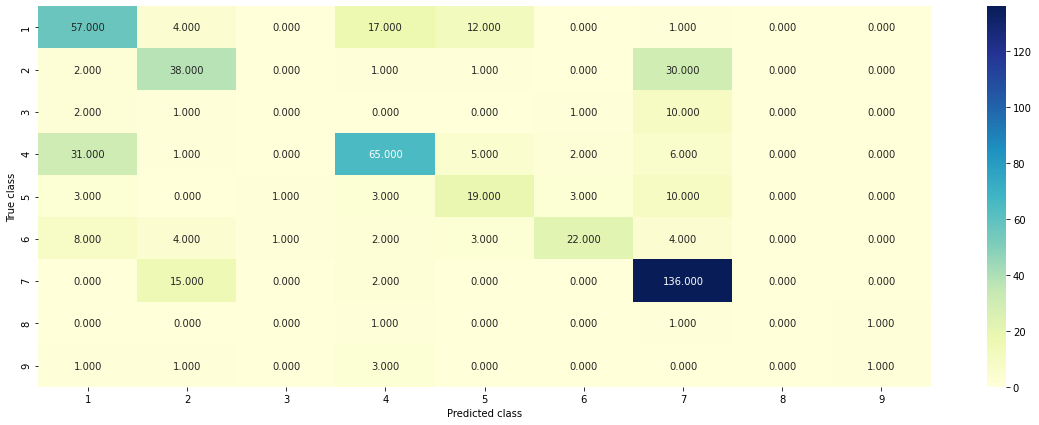

==================== Precision Matrix ====================


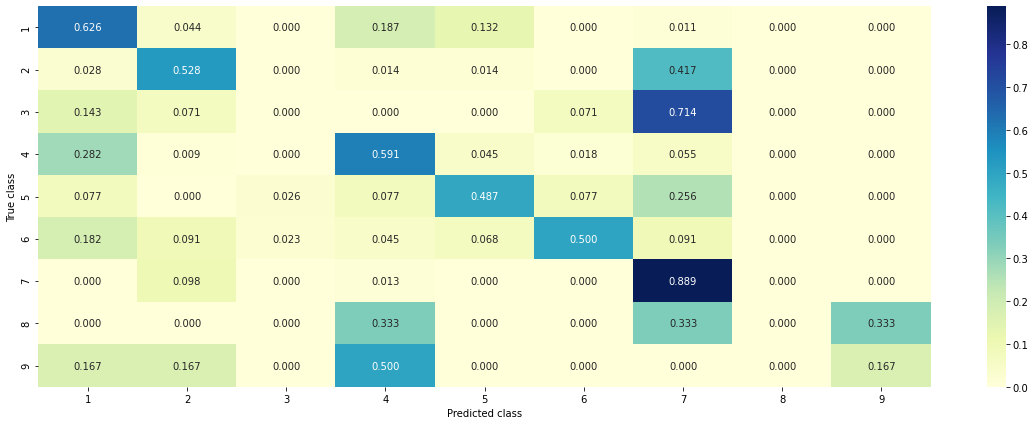

==================== Recall Matrix ====================


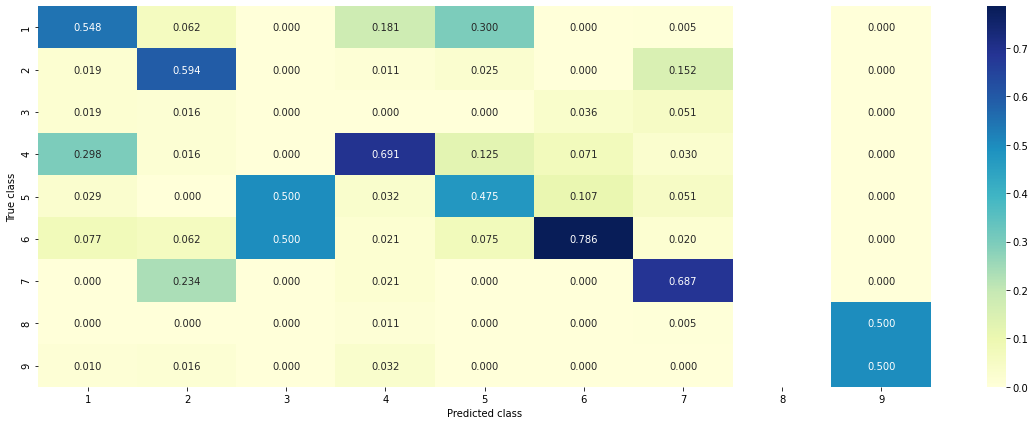

In [0]:
plot_confusion_matrix(y_cv, stack_clf.predict(cv_x_tfidf_encoding))

# 14. Model 14 - Maximum Voting Classifier - train_x_tfidf_encoding

In [0]:
from sklearn.ensemble import VotingClassifier
vote_clf = VotingClassifier(estimators=[('lr',calib_clf_1), ('svc',calib_clf_2), ('rf',calib_clf_3)], voting='soft')
vote_clf.fit(train_x_tfidf_encoding, y_train)
print("Log loss (train) on the VotingClassifier :", log_loss(y_train, vote_clf.predict_proba(train_x_tfidf_encoding)))
print("Log loss (CV) on the VotingClassifier :", log_loss(y_cv, vote_clf.predict_proba(cv_x_tfidf_encoding)))
print("Log loss (test) on the VotingClassifier :", log_loss(y_test, vote_clf.predict_proba(test_x_tfidf_encoding)))
print("Number of missclassified point :", np.count_nonzero((vote_clf.predict(test_x_tfidf_encoding)- y_test))/y_test.shape[0])

Log loss (train) on the VotingClassifier : 0.7967217396226207
Log loss (CV) on the VotingClassifier : 1.1701846388640262
Log loss (test) on the VotingClassifier : 1.1904718379582213
Number of missclassified point : 0.3819548872180451


### 14.1 Plot Confusion matrix

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


==================== Confusion Matrix ====================


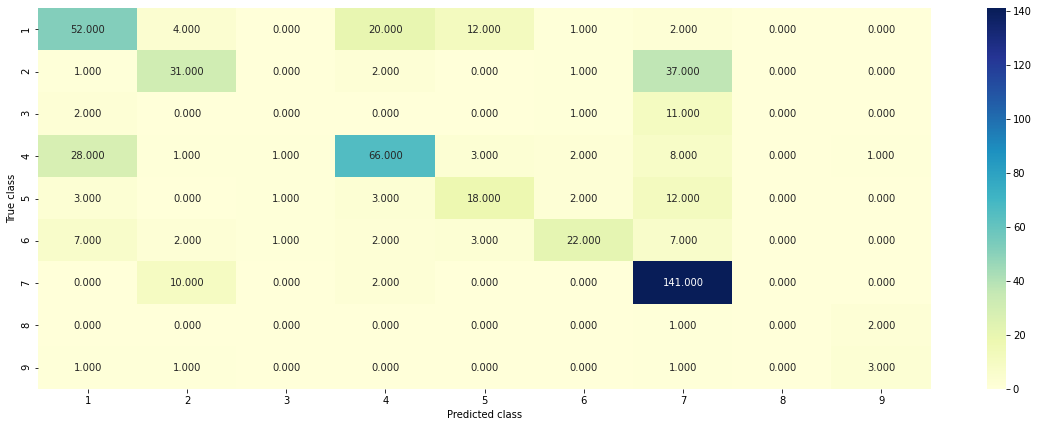

==================== Precision Matrix ====================


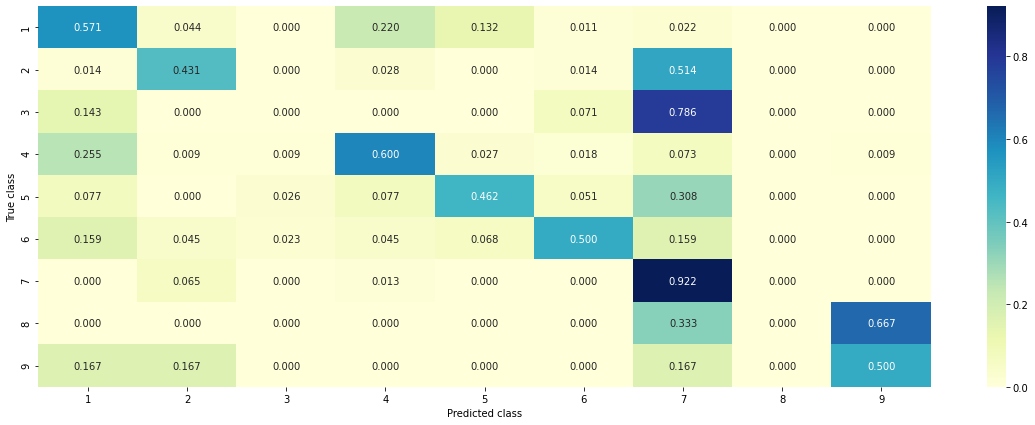

==================== Recall Matrix ====================


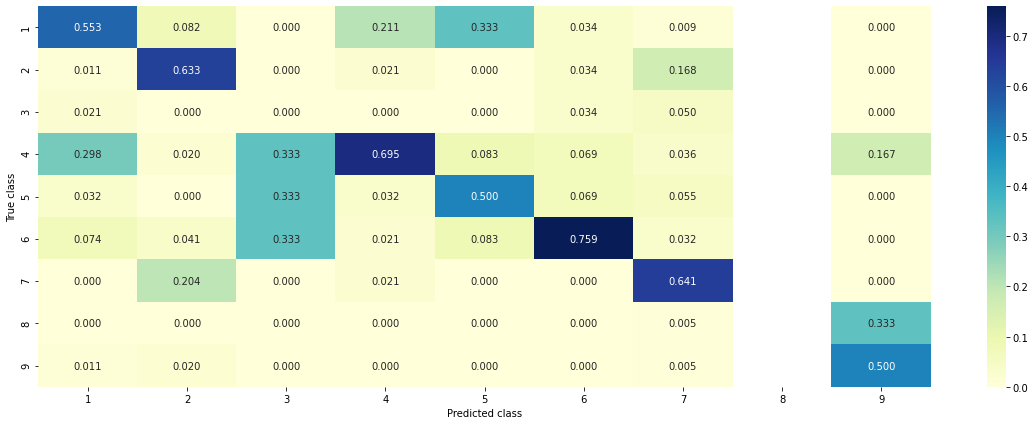

In [0]:
plot_confusion_matrix(y_cv, vote_clf.predict(cv_x_tfidf_encoding))

# Summary:

In [0]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ['Model', 'Encoding', 'Training Log loss', 'Validation log loss', 'Test log loss']
x.add_row(['Voting', 'TFIDF', '0.796', '1.130', '1.190'])
x.add_row(['Stacking','TFIDF', '0.442', '1.142', '1.168'])
x.add_row(['Random Forest', 'Response Encoding', '0.06', '1.246', '1.236'])
x.add_row(['Linear SVM', 'TFIDF', '0.319', '1.043', '1.035'])
x.add_row(['Logistic Regression(without balanced)', ' TFIDF ', '0.350', '0.986', '0.790'])
x.add_row(['Logistic Regression(balanced)', 'TFIDF', '0.362', '0.958', '0.992'])
x.add_row(['KNN', 'Response Encoding', '0.511', '1.019', '1.101'])
x.add_row(['NB', 'TFIDF', '0.601', '1.198', '1.190'])
print(x)

+---------------------------------------+-------------------+-------------------+---------------------+---------------+
|                 Model                 |      Encoding     | Training Log loss | Validation log loss | Test log loss |
+---------------------------------------+-------------------+-------------------+---------------------+---------------+
|                 Voting                |       TFIDF       |       0.796       |        1.130        |     1.190     |
|                Stacking               |       TFIDF       |       0.442       |        1.142        |     1.168     |
|             Random Forest             | Response Encoding |        0.06       |        1.246        |     1.236     |
|               Linear SVM              |       TFIDF       |       0.319       |        1.043        |     1.035     |
| Logistic Regression(without balanced) |       TFIDF       |       0.350       |        0.986        |     0.790     |
|     Logistic Regression(balanced)     

# **TASK - 2**
- Using only top 1000 words in the text field

In [0]:
result.head()

,ID,Gene,Variation,Class,Text
0,0,FAM58A,Truncating_Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer()
train_text_tfidf_encoding = tfidf_vec.fit_transform(train_df['Text'])

### 1.1 Top 1000 idf value words

In [0]:
#getting the words in the Text feature
words = tfidf_vec.get_feature_names()
print(words)
print(len(words))

## Note: The output is removed

In [0]:
#idf values of each word
idf_values = tfidf_vec.idf_
print(idf_values)
print(len(idf_values))

[2.80359393 1.58402903 7.27523272 ... 7.9683799  7.9683799  7.9683799 ]
125709


In [0]:
idf_df = pd.DataFrame()
idf_df['words'] = words
idf_df['idf_value'] = idf_values
idf_df.head(4)

,words,idf_value
0,00,2.803594
1,000,1.584029
2,0000,7.275233
3,0000000000000188,7.968380


In [0]:
# sort it in descending order
idf_df.sort_values(by='idf_value', ascending=False, inplace=True)
idf_df

,words,idf_value
62854,ighj4,7.968380
67025,juo,7.968380
67064,jvc,7.968380
67063,jv18,7.968380
67062,juxtapositions,7.968380
...,...,...
1544,10,1.027190
31490,cells,1.024775
80035,mutations,1.016608
100721,results,1.012787


In [0]:
#selecting top 1000 words
idf_df = idf_df[0:1000]
idf_df.head()

,words,idf_value
62854,ighj4,7.96838
67025,juo,7.96838
67064,jvc,7.96838
67063,jv18,7.96838
67062,juxtapositions,7.96838


In [0]:
list(idf_df['words'].values)

## Note: The output is removed

In [0]:
top_1000_words = list(idf_df['words'])
print(len(top_1000_words))

1000


In [0]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer()

#fitting on top 1000 words
count_vec.fit(top_1000_words)
print(count_vec.vocabulary_)

## Note : The output is removed

In [0]:
#Since we fitted the using the top 1000 words, Now we can transform all the train , test and cv data
train_1000_one_hot_encoding = count_vec.transform(train_df['Text'])
cv_1000_one_hot_encoding = count_vec.transform(cv_df['Text'])
test_1000_one_hot_encoding = count_vec.transform(test_df['Text'])

In [0]:
print(train_1000_one_hot_encoding.shape)
print(cv_1000_one_hot_encoding.shape)
print(test_1000_one_hot_encoding.shape)

(2124, 1000)
(532, 1000)
(665, 1000)


## 1.2 Models to be created:
- Naive Bayes
- Random Forest
- Logistic Regression 
- Linear SVM

## 1.3 Model -1 Naive Bayes

In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss

alpha = [10**x for x in range(-5,3)]
cv_log_loss = []
for i in alpha:
    clf = MultinomialNB(alpha=i)
    clf.fit(train_1000_one_hot_encoding, y_train)
    calib_clf = CalibratedClassifierCV(clf, method='sigmoid')
    calib_clf.fit(train_1000_one_hot_encoding, y_train)
    pred_y = calib_clf.predict_proba(cv_1000_one_hot_encoding)
    cv_log_loss.append(log_loss(y_cv, pred_y, labels=clf.classes_, eps=1e-15))
    print('For alpha =', i)
    print('log loss = ', log_loss(y_cv, pred_y, labels=clf.classes_, eps=1e-15))

For alpha = 1e-05
log loss =  1.8464697931153178
For alpha = 0.0001
log loss =  1.8489063176620113
For alpha = 0.001
log loss =  1.8484624950837762
For alpha = 0.01
log loss =  1.8481342618204177
For alpha = 0.1
log loss =  1.8518952721082522
For alpha = 1
log loss =  1.838025808208519
For alpha = 10
log loss =  1.8383590503906801
For alpha = 100
log loss =  1.8347799280812016


In [0]:
print(cv_log_loss)

[1.8464697931153178, 1.8489063176620113, 1.8484624950837762, 1.8481342618204177, 1.8518952721082522, 1.838025808208519, 1.8383590503906801, 1.8347799280812016]


### 1.3.1 Plot Hyperparameter vs Loss

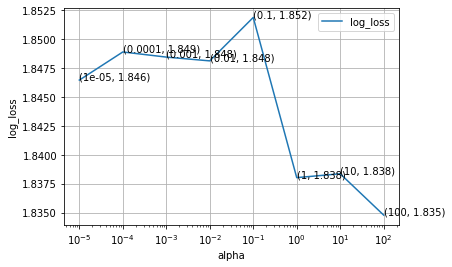

In [0]:
plt.plot(alpha,cv_log_loss, label='log_loss')
for i ,j in enumerate(cv_log_loss):
    plt.annotate((alpha[i], np.round(j,3)), (alpha[i], j))

plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('log_loss')
plt.legend()
plt.grid()
plt.show()

### 1.3.2 Modelling with best Hyperparameter

In [0]:

best_alpha = alpha[np.argmin(cv_log_loss)]
clf = MultinomialNB(alpha=best_alpha)
clf.fit(train_1000_one_hot_encoding, y_train)
calib_clf = CalibratedClassifierCV(clf, method="sigmoid")
calib_clf.fit(train_1000_one_hot_encoding, y_train)


predict_y = calib_clf.predict_proba(train_1000_one_hot_encoding)
print('For values of best alpha = ', best_alpha, "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = calib_clf.predict_proba(cv_1000_one_hot_encoding)
print('For values of best alpha = ', best_alpha, "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = calib_clf.predict_proba(test_1000_one_hot_encoding)
print('For values of best alpha = ', best_alpha, "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


For values of best alpha =  100 The train log loss is: 1.8701643361098725
For values of best alpha =  100 The cross validation log loss is: 1.8347799280812016
For values of best alpha =  100 The test log loss is: 1.8481643426790353


### 1.3.3 Plot confusion matrix

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


==================== Confusion Matrix ====================


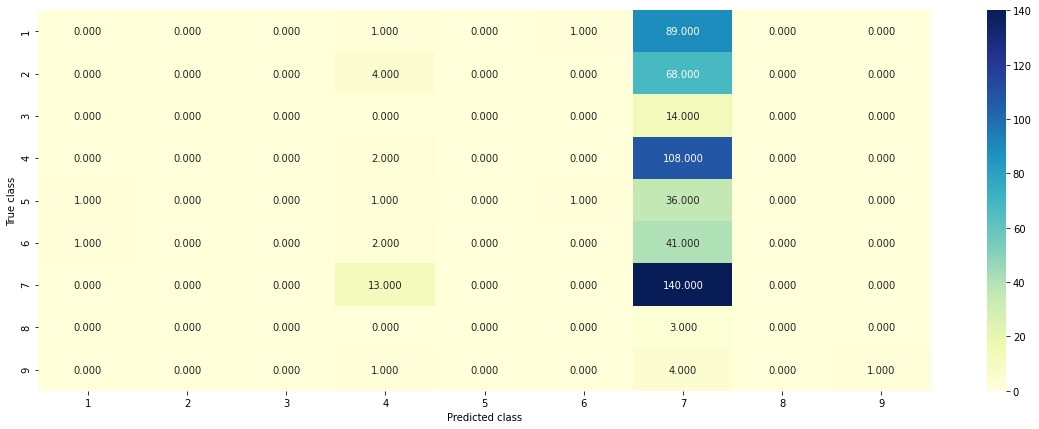

==================== Precision Matrix ====================


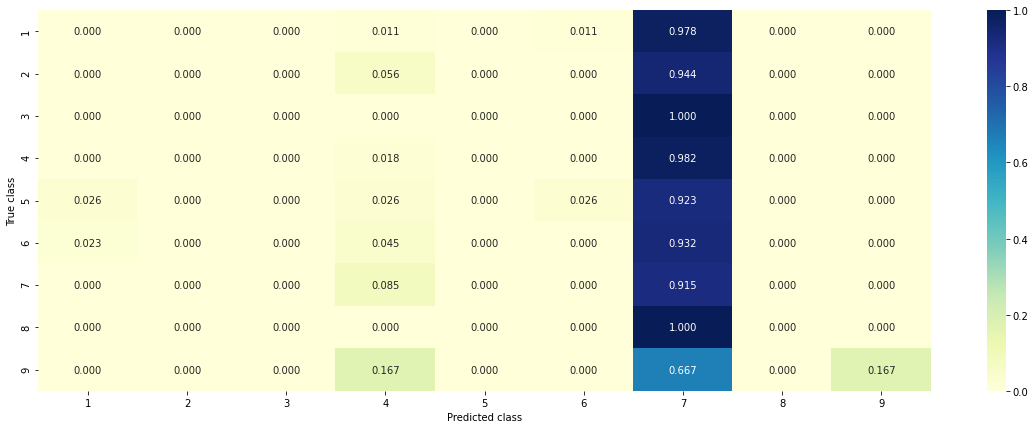

==================== Recall Matrix ====================


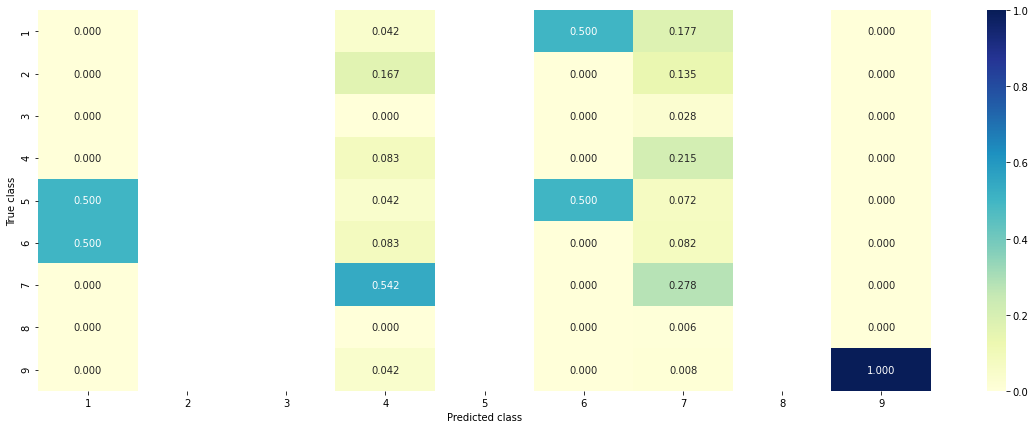

In [0]:
plot_confusion_matrix(y_cv, calib_clf.predict(cv_1000_one_hot_encoding))

### 1.3.4 Feature Importance

In [0]:
no_feature=200
test_point_index = 200
predicted_cls = calib_clf.predict(test_1000_one_hot_encoding[test_point_index])
print('Actual class:', y_test[test_point_index])
print('predicted class:', predicted_cls)

indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
get_imp_feature_names(indices[0], test_df['Text'].iloc[test_point_index], test_df['Gene'].iloc[test_point_index], test_df['Variation'].iloc[test_point_index], no_feature)

Actual class: 1
predicted class: [7]
239
1961


## 1.4 Model-2: Logistic Regression

In [0]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss

alpha = [10**x for x in range(-5,1)]

cv_log_loss = []
for i in alpha :
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_1000_one_hot_encoding, y_train)
    calib_clf = CalibratedClassifierCV(clf, method='sigmoid')
    calib_clf.fit(train_1000_one_hot_encoding, y_train)
    predict_y = calib_clf.predict_proba(cv_1000_one_hot_encoding)
    logloss  = log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15)
    cv_log_loss.append(logloss)
    print('For the value of alpha:{}, the log_loss is {}'.format(i, logloss))

For the value of alpha:1e-05, the log_loss is 1.8140651841328428
For the value of alpha:0.0001, the log_loss is 1.8261457680620594
For the value of alpha:0.001, the log_loss is 1.8296055192062965
For the value of alpha:0.01, the log_loss is 1.8300607120608874
For the value of alpha:0.1, the log_loss is 1.8303263917762629
For the value of alpha:1, the log_loss is 1.8303531986378014


### 1.4.1 Plotting Hyperparameter vs Log_loss

1e-05 : 1.8140651841328428
0.0001 : 1.8261457680620594
0.001 : 1.8296055192062965
0.01 : 1.8300607120608874
0.1 : 1.8303263917762629
1 : 1.8303531986378014


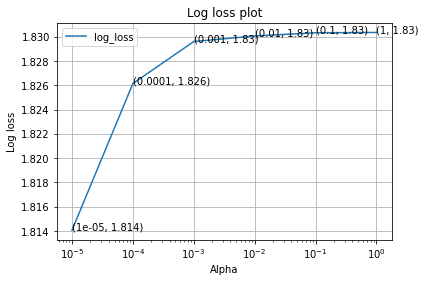

In [0]:
plt.plot(alpha, cv_log_loss, label='log_loss')
for i, j in enumerate(cv_log_loss):
  print(alpha[i],':',j)
  plt.annotate((alpha[i], np.round(j, 3)), (alpha[i], j))
plt.title('Log loss plot')
plt.xlabel('Alpha')
plt.ylabel('Log loss')
plt.xscale('log')
plt.legend()
plt.grid()
plt.show()

### 1.4.2 Modelling by best Hyperparameter

In [0]:
best_alpha = alpha[np.argmin(cv_log_loss)]
clf = SGDClassifier(alpha=best_alpha, loss='log', penalty='l2', random_state=42)
clf.fit(train_1000_one_hot_encoding, y_train)
calib_clf = CalibratedClassifierCV(clf, method='sigmoid')
calib_clf.fit(train_1000_one_hot_encoding, y_train)


predicted_y = calib_clf.predict_proba(train_1000_one_hot_encoding)
print('Training log loss for tfidf encoded gene feature:', log_loss(y_train, predicted_y, labels=clf.classes_, eps=1e-15))

predicted_y = calib_clf.predict_proba(cv_1000_one_hot_encoding)
print('Cv log loss for tfidf encoded gene feature:', log_loss(y_cv, predicted_y, labels=clf.classes_, eps=1e-15))

predicted_y = calib_clf.predict_proba(test_1000_one_hot_encoding)
print('Test log loss for tfidf encoded gene feature:', log_loss(y_test, predicted_y, labels=clf.classes_, eps=1e-15))

Training log loss for tfidf encoded gene feature: 1.7868897060715723
Cv log loss for tfidf encoded gene feature: 1.8140651841328428
Test log loss for tfidf encoded gene feature: 1.827201048010936


### 1.4.3 Plot Confusion matrix

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


==================== Confusion Matrix ====================


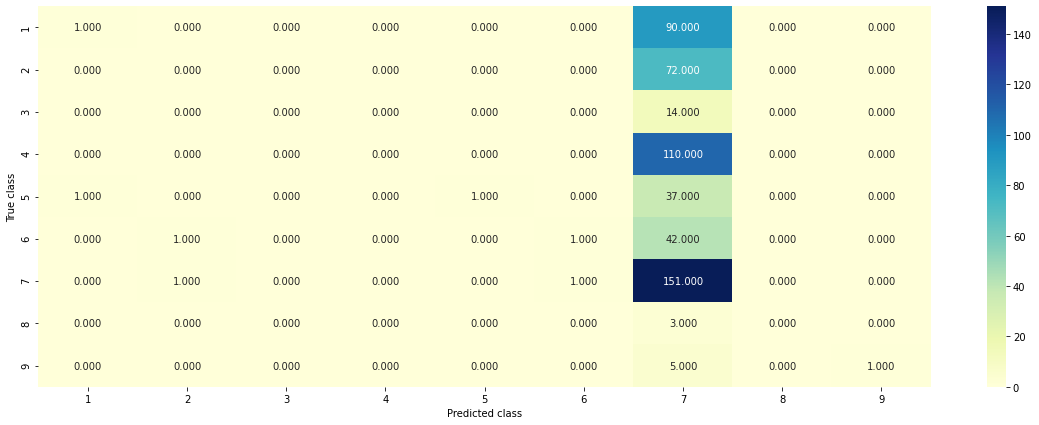

==================== Precision Matrix ====================


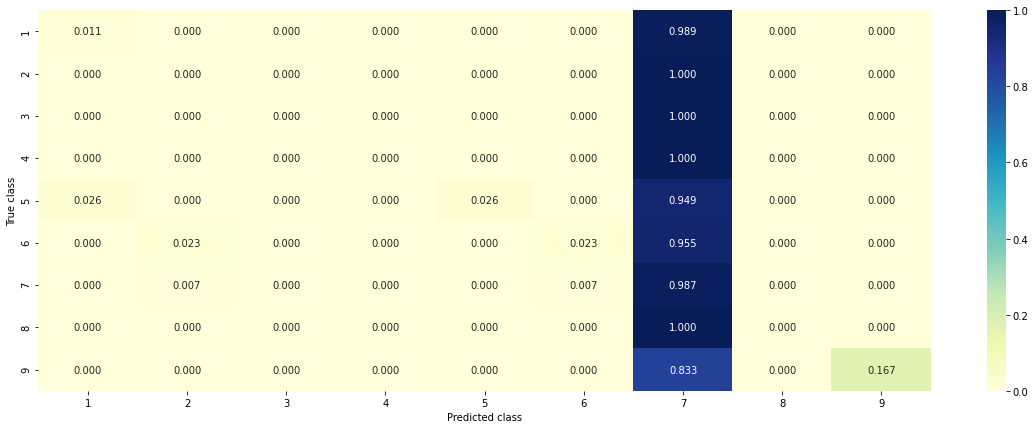

==================== Recall Matrix ====================


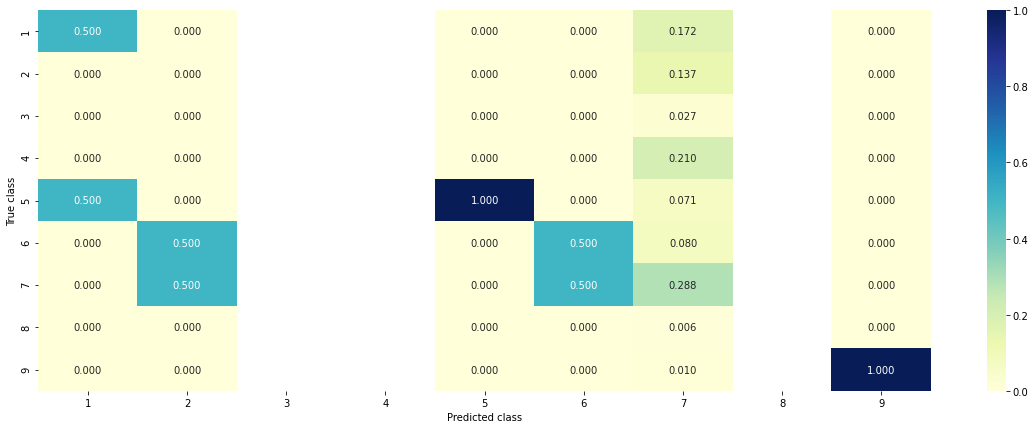

In [0]:
plot_confusion_matrix(y_cv, calib_clf.predict(cv_1000_one_hot_encoding))

## 1.5 Model-3 : Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = [100,200,500,1000,2000]
max_depth = [5,10]

cv_log_loss = []
for i in n_estimators:
    for j in max_depth:
        print("for n_estimators:{} and max_depth:{}".format(i, j))
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_1000_one_hot_encoding, y_train)
        calib_clf = CalibratedClassifierCV(clf, method="sigmoid")
        calib_clf.fit(train_1000_one_hot_encoding, y_train)
        calib_clf_probs = calib_clf.predict_proba(cv_1000_one_hot_encoding)
        cv_log_loss.append(log_loss(y_cv, calib_clf_probs, labels=clf.classes_, eps=1e-15))
        # to avoid rounding error while multiplying probabilites we use log-probability estimates
        print("Log Loss :",log_loss(y_cv, calib_clf_probs)) 

for n_estimators:100 and max_depth:5
Log Loss : 1.8303546047908643
for n_estimators:100 and max_depth:10
Log Loss : 1.8303556019454776
for n_estimators:200 and max_depth:5
Log Loss : 1.8303545330101352
for n_estimators:200 and max_depth:10
Log Loss : 1.8303554794076842
for n_estimators:500 and max_depth:5
Log Loss : 1.8303545222531676
for n_estimators:500 and max_depth:10
Log Loss : 1.8303553835058624
for n_estimators:1000 and max_depth:5
Log Loss : 1.8303545200628317
for n_estimators:1000 and max_depth:10
Log Loss : 1.8303553469326783
for n_estimators:2000 and max_depth:5
Log Loss : 1.8303544940459842
for n_estimators:2000 and max_depth:10
Log Loss : 1.8303553095311444


In [0]:
print(cv_log_loss)

[1.8303546047908643, 1.8303556019454776, 1.8303545330101352, 1.8303554794076842, 1.8303545222531676, 1.8303553835058624, 1.8303545200628317, 1.8303553469326783, 1.8303544940459842, 1.8303553095311444]


### 11.1 Modelling with best hyperparameter

In [0]:
best_n_estimator = n_estimators[int(np.argmin(cv_log_loss)/2)]
best_max_depth = max_depth[int(np.argmin(cv_log_loss)%2)]

clf = RandomForestClassifier(n_estimators=best_n_estimator, criterion='gini', max_depth=best_max_depth, random_state=42, n_jobs=-1)
clf.fit(train_1000_one_hot_encoding, y_train)
calib_clf = CalibratedClassifierCV(clf, method="sigmoid")
calib_clf.fit(train_1000_one_hot_encoding, y_train)

predict_y = calib_clf.predict_proba(train_1000_one_hot_encoding)
print('For values of best estimator = ', best_n_estimator, 'and the best_max_depth=',best_max_depth,"The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = calib_clf.predict_proba(cv_1000_one_hot_encoding)
print('For values of best estimator = ', best_n_estimator, 'and the best_max_depth=',best_max_depth, "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = calib_clf.predict_proba(test_1000_one_hot_encoding)
print('For values of best estimator = ', best_n_estimator, 'and the best_max_depth=',best_max_depth, "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

For values of best estimator =  2000 and the best_max_depth= 5 The train log loss is: 1.8318654342684912
For values of best estimator =  2000 and the best_max_depth= 5 The cross validation log loss is: 1.8303544940459842
For values of best estimator =  2000 and the best_max_depth= 5 The test log loss is: 1.8306770453308248


### 11.2 Plotting confusion matrix

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


==================== Confusion Matrix ====================


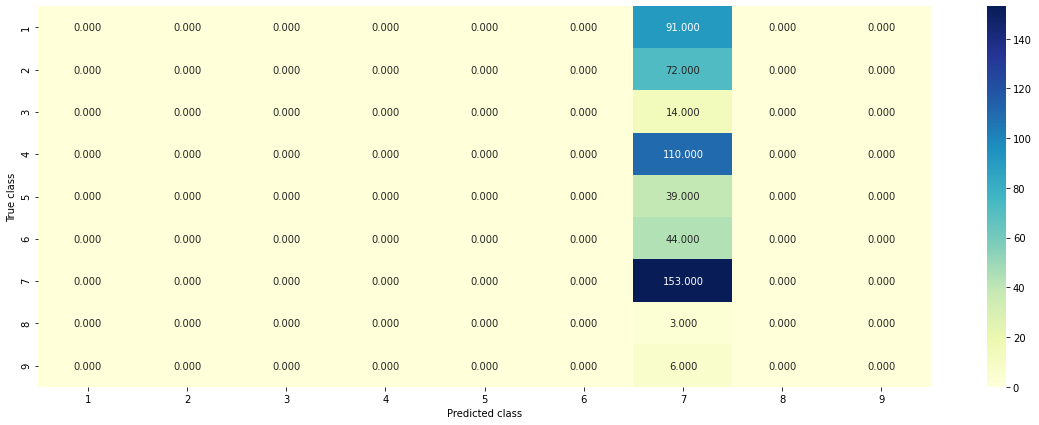

==================== Precision Matrix ====================


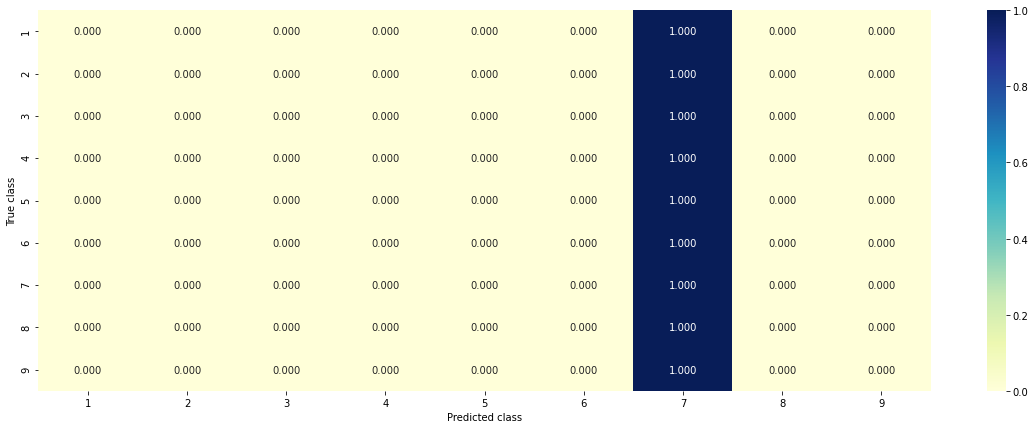

==================== Recall Matrix ====================


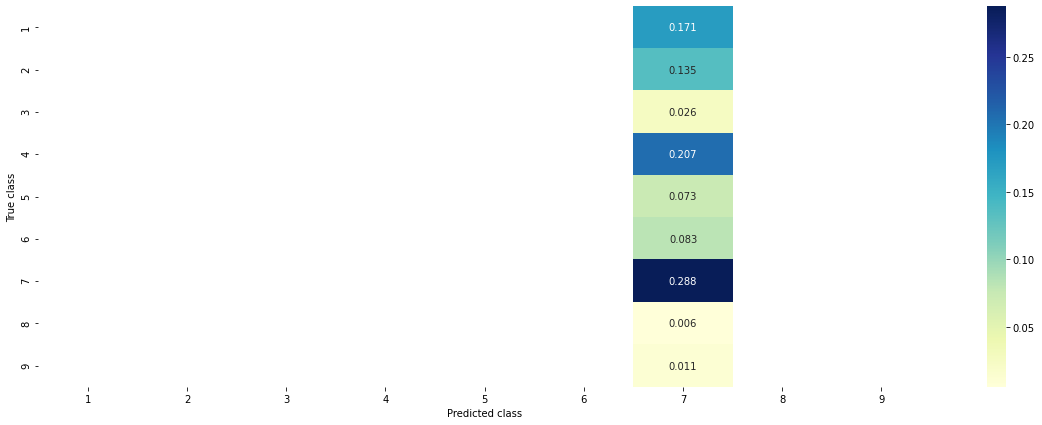

In [0]:
plot_confusion_matrix(y_cv, calib_clf.predict(cv_1000_one_hot_encoding))

### 11.3 Feature importance

In [0]:
test_point_index = 46

clf = RandomForestClassifier(n_estimators=best_n_estimator, criterion='gini', max_depth=best_max_depth, random_state=42, n_jobs=-1)
clf.fit(train_1000_one_hot_encoding, y_train)
calib_clf = CalibratedClassifierCV(clf, method="sigmoid")
calib_clf.fit(train_1000_one_hot_encoding, y_train)

print('Actual class of the test point', y_test[test_point_index])
print('predicted class of the test point', calib_clf.predict(test_1000_one_hot_encoding[test_point_index].reshape(1,-1)))
print('Predicted probs of the test point', calib_clf.predict_proba(test_1000_one_hot_encoding[test_point_index].reshape(1,-1)))

indices = np.argsort(-clf.feature_importances_)
for i in indices:
    if i<9:
        print('Gene feature of index {} is important'.format(i))
    elif i>9 and i<19:
        print('Variation feature of index {} is important'.format(i))
    elif i>18:
        print('Text feature of index {} is important'.format(i))

## Note: The output is removed

## 1.6 Model-4: Linear SVM

In [0]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss

alpha = [10**x for x in range(-5,1)]

cv_log_loss = []
for i in alpha :
    clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_1000_one_hot_encoding, y_train)
    calib_clf = CalibratedClassifierCV(clf, method='sigmoid')
    calib_clf.fit(train_1000_one_hot_encoding, y_train)
    predict_y = calib_clf.predict_proba(cv_1000_one_hot_encoding)
    logloss  = log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15)
    cv_log_loss.append(logloss)
    print('For the value of alpha:{}, the log_loss is {}'.format(i, logloss))

For the value of alpha:1e-05, the log_loss is 1.8090727133950295
For the value of alpha:0.0001, the log_loss is 1.821181808391469
For the value of alpha:0.001, the log_loss is 1.8290906577288142
For the value of alpha:0.01, the log_loss is 1.8299781258479813
For the value of alpha:0.1, the log_loss is 1.83028245378411
For the value of alpha:1, the log_loss is 1.8303518456827574


### 1.4.1 Plotting Hyperparameter vs Log_loss

1e-05 : 1.8090727133950295
0.0001 : 1.821181808391469
0.001 : 1.8290906577288142
0.01 : 1.8299781258479813
0.1 : 1.83028245378411
1 : 1.8303518456827574


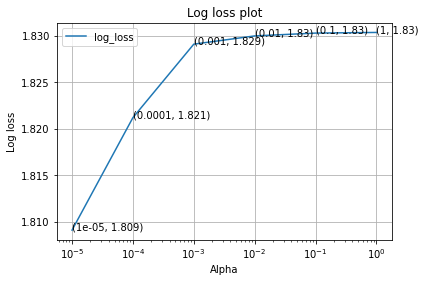

In [0]:
plt.plot(alpha, cv_log_loss, label='log_loss')
for i, j in enumerate(cv_log_loss):
  print(alpha[i],':',j)
  plt.annotate((alpha[i], np.round(j, 3)), (alpha[i], j))
plt.title('Log loss plot')
plt.xlabel('Alpha')
plt.ylabel('Log loss')
plt.xscale('log')
plt.legend()
plt.grid()
plt.show()

### 1.4.2 Modelling by best Hyperparameter

In [0]:
best_alpha = alpha[np.argmin(cv_log_loss)]
clf = SGDClassifier(alpha=best_alpha, loss='hinge', penalty='l2', random_state=42)
clf.fit(train_1000_one_hot_encoding, y_train)
calib_clf = CalibratedClassifierCV(clf, method='sigmoid')
calib_clf.fit(train_1000_one_hot_encoding, y_train)


predicted_y = calib_clf.predict_proba(train_1000_one_hot_encoding)
print('Training log loss for tfidf encoded gene feature:', log_loss(y_train, predicted_y, labels=clf.classes_, eps=1e-15))

predicted_y = calib_clf.predict_proba(cv_1000_one_hot_encoding)
print('Cv log loss for tfidf encoded gene feature:', log_loss(y_cv, predicted_y, labels=clf.classes_, eps=1e-15))

predicted_y = calib_clf.predict_proba(test_1000_one_hot_encoding)
print('Test log loss for tfidf encoded gene feature:', log_loss(y_test, predicted_y, labels=clf.classes_, eps=1e-15))

Training log loss for tfidf encoded gene feature: 1.7726444353820288
Cv log loss for tfidf encoded gene feature: 1.8090727133950295
Test log loss for tfidf encoded gene feature: 1.8222381339708154


### 1.4.3 Plot Confusion matrix

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


==================== Confusion Matrix ====================


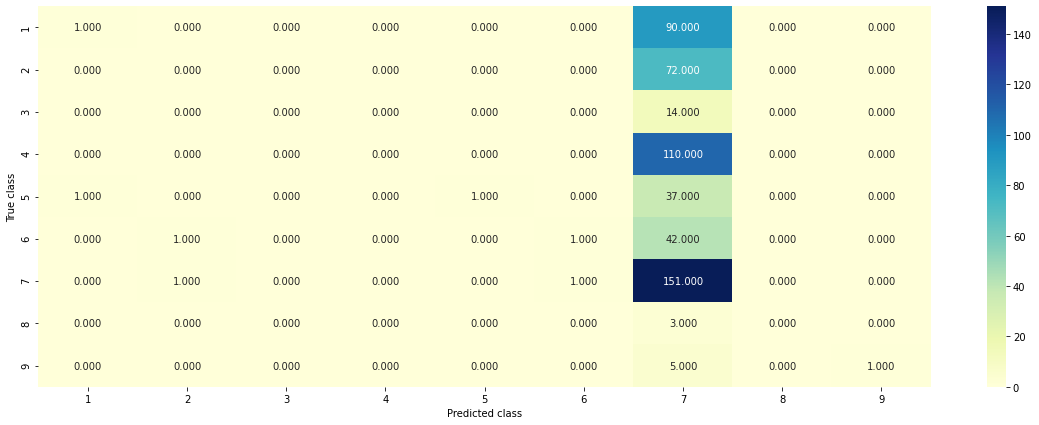

==================== Precision Matrix ====================


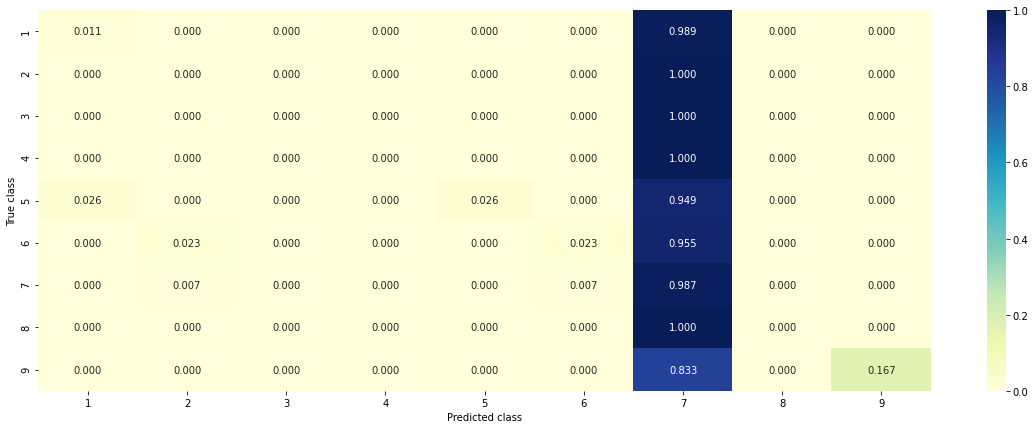

==================== Recall Matrix ====================


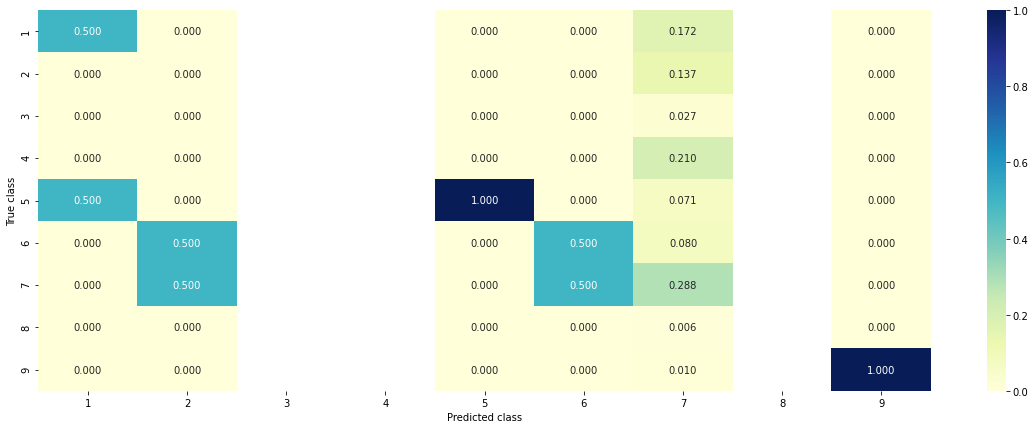

In [0]:
plot_confusion_matrix(y_cv, calib_clf.predict(cv_1000_one_hot_encoding))

# Summary:

In [0]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ['Model', 'Training Log loss', 'Validation log loss', 'Test log loss']
x.add_row(['Linear SVM', '1.772', '1.809', '1.822'])
x.add_row(['Random Forest', '1.831', '1.814', '1.827'])
x.add_row(['Logistic Regression', '1.786', '1.814', '1.827'])
x.add_row(['Naive Bayes', '1.870', '1.834', '1.848'])
print(x)

+---------------------+-------------------+---------------------+---------------+
|        Model        | Training Log loss | Validation log loss | Test log loss |
+---------------------+-------------------+---------------------+---------------+
|      Linear SVM     |       1.772       |        1.809        |     1.822     |
|    Random Forest    |       1.831       |        1.814        |     1.827     |
| Logistic Regression |       1.786       |        1.814        |     1.827     |
|     Naive Bayes     |       1.870       |        1.834        |     1.848     |
+---------------------+-------------------+---------------------+---------------+


# **TASK-3**
- Applying logistic regression on unigrams and bigrams

In [0]:
result.head(2)

,ID,Gene,Variation,Class,Text
0,0,FAM58A,Truncating_Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...


### 1.1 Applying unigram and bigram to text data

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
text_vec = CountVectorizer(ngram_range=(1,2))    #applying unigram and bigram to the text data
train_text_one_hot_encoding = text_vec.fit_transform(train_df['Text'])
cv_text_one_hot_encoding = text_vec.transform(cv_df['Text'])
test_text_one_hot_encoding = text_vec.transform(test_df['Text'])

In [0]:
print(train_text_one_hot_encoding.shape)
print(cv_text_one_hot_encoding.shape)
print(test_text_one_hot_encoding.shape)

(2124, 2362569)
(532, 2362569)
(665, 2362569)


### 1.2 Modelling - Logistic Regression

In [0]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss
alpha = [10**x for x in range(-5,1)]
cv_log_loss = []
for i in alpha:
    clf = SGDClassifier(loss='log', alpha=i, penalty='l2', random_state=42)
    clf.fit(train_text_one_hot_encoding, y_train)
    calib_clf = CalibratedClassifierCV(clf, method='sigmoid')
    calib_clf.fit(train_text_one_hot_encoding, y_train)
    predict_y = calib_clf.predict_proba(cv_text_one_hot_encoding)
    loss = log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15)
    cv_log_loss.append(loss)
    print('For values of alpha = ', i, "The log loss is:", loss)

For values of alpha =  1e-05 The log loss is: 1.8308894970074718
For values of alpha =  0.0001 The log loss is: 1.81883228183927
For values of alpha =  0.001 The log loss is: 1.309636361817722
For values of alpha =  0.01 The log loss is: 1.2980157276315456
For values of alpha =  0.1 The log loss is: 1.2948568854310993
For values of alpha =  1 The log loss is: 1.2197286729141898


In [0]:
cv_log_loss = [1.8308894970074718, 1.81883228183927, 1.309636361817722, 1.2980157276315456, 1.2948568854310993, 1.2197286729141898]
print(cv_log_loss)

[1.8308894970074718, 1.81883228183927, 1.309636361817722, 1.2980157276315456, 1.2948568854310993, 1.2197286729141898]


### 1.3 Hyperparameter vs Loss

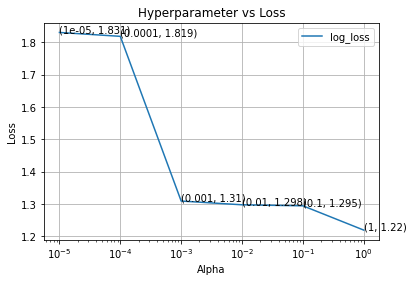

In [0]:
plt.plot(alpha, cv_log_loss, label='log_loss')
for i, text in enumerate(np.round(cv_log_loss, 3)):
    plt.annotate((alpha[i], np.round(text,3)), (alpha[i], cv_log_loss[i]))
plt.title('Hyperparameter vs Loss')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

### 1.4 Modelling with best hyper parameter

In [0]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss
alpha = [10**x for x in range(-5,1)]
best_alpha = alpha[np.argmin(cv_log_loss)]

clf = SGDClassifier(loss='log', alpha=best_alpha, penalty='l2', random_state=42)
clf.fit(train_text_one_hot_encoding, y_train)
calib_clf = CalibratedClassifierCV(clf, method='sigmoid')
calib_clf.fit(train_text_one_hot_encoding, y_train)

predict_y = calib_clf.predict_proba(train_text_one_hot_encoding)
print('For values of best alpha = ', best_alpha, "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = calib_clf.predict_proba(cv_text_one_hot_encoding)
print('For values of best alpha = ', best_alpha, "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = calib_clf.predict_proba(test_text_one_hot_encoding)
print('For values of best alpha = ', best_alpha, "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


For values of best alpha =  1 The train log loss is: 0.7555106794546982
For values of best alpha =  1 The cross validation log loss is: 1.2250644888162454
For values of best alpha =  1 The test log loss is: 1.1938972027569157


### 1.5 plot confusion matrix

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


==================== Confusion Matrix ====================


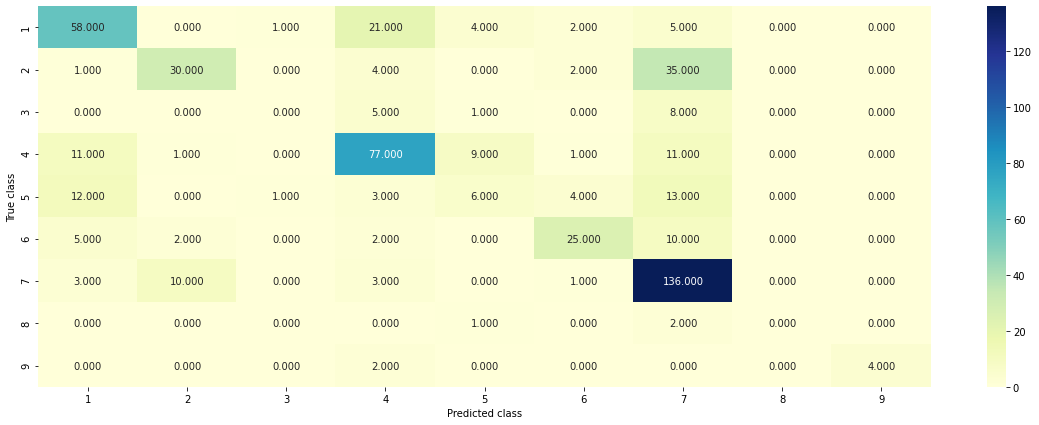

==================== Precision Matrix ====================


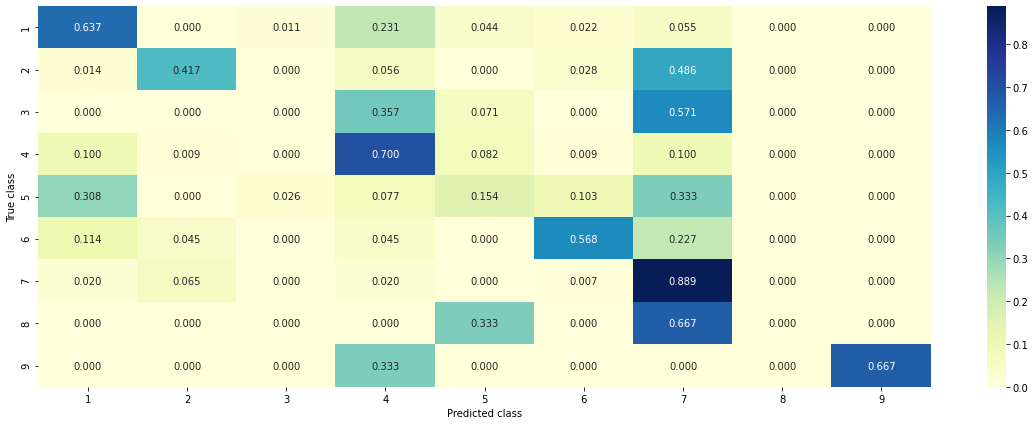

==================== Recall Matrix ====================


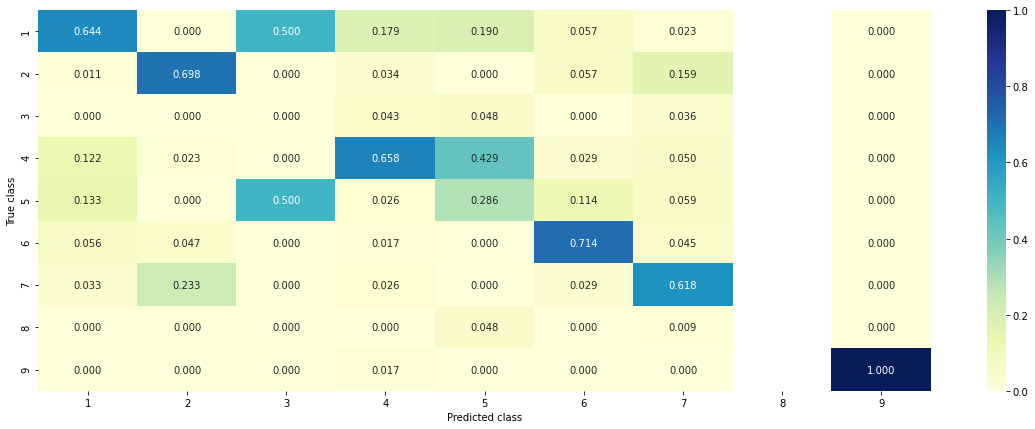

In [0]:
plot_confusion_matrix(y_cv, calib_clf.predict(cv_text_one_hot_encoding))

### 1.6 Feature importance

In [0]:
np.argsort(-1*clf.coef_)

array([[ 690251, 1509779, 1329921, ..., 1918213, 1252165,  984535],
       [1563002, 1666212,  386367, ..., 1466155, 1909752,  843110],
       [1088138, 1456236, 2058297, ..., 1564448, 1753275, 2233457],
       ...,
       [ 843110, 1532942, 1509373, ..., 1636975, 2137647,   92466],
       [1053083,  765144, 1084797, ..., 2054420,  927610, 1476106],
       [1985293, 1123881, 1404264, ..., 2160071,  659085, 1476106]])

- These are the index of the words which are very important for this model

# Summary:

In [0]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ['Model', 'Training Log loss', 'Validation log loss', 'Test log loss']
x.add_row(['Logistic Regression', '0.755', '1.225', '1.193'])
print(x)

+---------------------+-------------------+---------------------+---------------+
|        Model        | Training Log loss | Validation log loss | Test log loss |
+---------------------+-------------------+---------------------+---------------+
| Logistic Regression |       0.755       |        1.225        |     1.193     |
+---------------------+-------------------+---------------------+---------------+


# **TASK-4**
### Applying our own feature engineering:
- Response encoding for categorical feature
- Embedding for text data using glove model 


## 1.1 Response Encoding for categorical feature

In [0]:
# Response coding : https://medium.com/@thewingedwolf.winterfell/response-coding-for-categorical-data-7bb8916c6dc1
#1. form a response table

def get_response_table(alpha, feature, df):    # get response table for gene and variation since both are categorical data
    counts = df[feature].value_counts()

    response_table_dict = dict()

    for i , denominator in counts.items():
        vec = []
        for k in range(1,10): #9 different classes
            cls_cnt = df.loc[(df['Class']==k) & (df[feature]==i)]
            vec.append( (cls_cnt.shape[0]+(alpha*10))/ (denominator+(alpha*90)) )

        response_table_dict[i] = vec

    return response_table_dict

In [0]:
def get_response_encoded_feature(alpha, feature, df, training_df):
    response_table_dict = get_response_table(alpha, feature, df)

    counts = training_df[feature].value_counts()     #checking the count in trianing_data

    encoded_feature = []
    for index, row in df.iterrows():    
        if row[feature] in dict(counts).keys():   # if the feature for the df(train, test, cv) is in training data then take from response_table_dict else add [1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9]
            encoded_feature.append(response_table_dict[row[feature]])

        else:
            encoded_feature.append([(1/result['Class'].nunique()) for i in list(result['Class'].unique())])  #put [1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9] by code

    return encoded_feature

In [0]:
# 1. Response encoding for gene feature
alpha = 1
train_resp_encoded_gene = np.array(get_response_encoded_feature(alpha, 'Gene', train_df, train_df))
test_resp_encoded_gene = np.array(get_response_encoded_feature(alpha, 'Gene', test_df, train_df))
cv_resp_encoded_gene = np.array(get_response_encoded_feature(alpha, 'Gene', cv_df, train_df))

In [0]:
# 2. Response encoding for variation feature
alpha = 1
train_resp_encoded_var = np.array(get_response_encoded_feature(alpha, 'Variation', train_df, train_df))
test_resp_encoded_var = np.array(get_response_encoded_feature(alpha, 'Variation', test_df, train_df))
cv_resp_encoded_var = np.array(get_response_encoded_feature(alpha, 'Variation', cv_df, train_df))

## 1.2 Word Embedding for text data

In [0]:
xx_train = train_df['Text']
xx_cv = cv_df['Text']
xx_test = test_df['Text']

In [0]:
import pickle
with open('/content/drive/My Drive/Applied AI/Datasets/New Donors/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words = set(model.keys())

In [0]:
#Avgw2V vector for text
from tqdm import tqdm

train_text_avg_w2v = []
test_text_avg_w2v = []
cv_text_avg_w2v = []

for i in tqdm(train_df['Text']):
    vector = np.zeros(300)
    cnt_words = 0
    
    for word in i.split():
        if word in glove_words:
            vector += model[word]
            cnt_words +=1
            
    if cnt_words !=0:
            vector /= cnt_words
            
    train_text_avg_w2v.append(vector)
    
for i in tqdm(test_df['Text']):
    vector = np.zeros(300)
    cnt_words = 0
    
    for word in i.split():
        if word in glove_words:
            vector += model[word]
            cnt_words +=1
            
    if cnt_words !=0:
            vector /= cnt_words
            
    test_text_avg_w2v.append(vector)

for i in tqdm(cv_df['Text']):
    vector = np.zeros(300)
    cnt_words = 0
    
    for word in i.split():
        if word in glove_words:
            vector += model[word]
            cnt_words +=1
            
    if cnt_words !=0:
            vector /= cnt_words
            
    cv_text_avg_w2v.append(vector)

100%|██████████| 532/532 [00:04<00:00, 130.66it/s]


In [0]:
print(len(train_text_avg_w2v))
print(len(train_text_avg_w2v[0]))
print('='*50)
print(len(test_text_avg_w2v))
print(len(test_text_avg_w2v[0]))
print('='*50)
print(len(cv_text_avg_w2v))
print(len(cv_text_avg_w2v[0]))

2124
300
665
300
532
300


In [0]:
np.array(train_text_avg_w2v).shape

(2124, 300)

In [0]:
train_text_avg_w2v = np.array(train_text_avg_w2v)
cv_text_avg_w2v = np.array(cv_text_avg_w2v)
test_text_avg_w2v = np.array(test_text_avg_w2v)

print(train_text_avg_w2v.shape)
print(cv_text_avg_w2v.shape)
print(test_text_avg_w2v.shape)

(2124, 300)
(532, 300)
(665, 300)


## 1.3 Stacking the data

In [0]:
print(train_resp_encoded_gene.shape)
print(train_resp_encoded_var.shape)

(2124, 9)
(2124, 9)


In [0]:
train_resp_gene_var = np.hstack((train_resp_encoded_gene, train_resp_encoded_var))
cv_resp_gene_var = np.hstack((cv_resp_encoded_gene, cv_resp_encoded_var))
test_gene_var = np.hstack((test_resp_encoded_gene, test_resp_encoded_gene))

X_train = np.hstack((train_resp_gene_var, train_text_avg_w2v))
X_val = np.hstack((cv_resp_gene_var, cv_text_avg_w2v))
X_test = np.hstack((test_gene_var, test_text_avg_w2v))

In [0]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(2124, 318)
(532, 318)
(665, 318)


## 1.4 Models to be created:
- Random Forest
- Logistic Regression 
- Linear SVM

## 1.4 Model-1: Logistic Regression

In [0]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss

alpha = [10**x for x in range(-5,1)]

cv_log_loss = []
for i in alpha :
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    calib_clf = CalibratedClassifierCV(clf, method='sigmoid')
    calib_clf.fit(X_train, y_train)
    predict_y = calib_clf.predict_proba(X_val)
    logloss  = log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15)
    cv_log_loss.append(logloss)
    print('For the value of alpha:{}, the log_loss is {}'.format(i, logloss))

For the value of alpha:1e-05, the log_loss is 1.1076799877007266
For the value of alpha:0.0001, the log_loss is 1.1557432878772478
For the value of alpha:0.001, the log_loss is 1.3105772067245958
For the value of alpha:0.01, the log_loss is 1.4486865550126957
For the value of alpha:0.1, the log_loss is 1.534385400423596
For the value of alpha:1, the log_loss is 1.7633932029078119


### 1.4.1 Plotting Hyperparameter vs Log_loss

1e-05 : 1.1076799877007266
0.0001 : 1.1557432878772478
0.001 : 1.3105772067245958
0.01 : 1.4486865550126957
0.1 : 1.534385400423596
1 : 1.7633932029078119


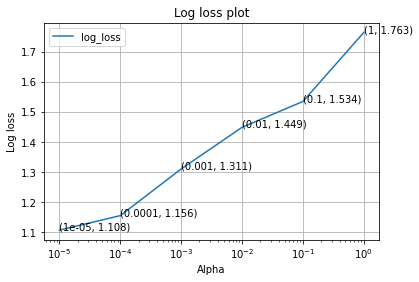

In [0]:
plt.plot(alpha, cv_log_loss, label='log_loss')
for i, j in enumerate(cv_log_loss):
  print(alpha[i],':',j)
  plt.annotate((alpha[i], np.round(j, 3)), (alpha[i], j))
plt.title('Log loss plot')
plt.xlabel('Alpha')
plt.ylabel('Log loss')
plt.xscale('log')
plt.legend()
plt.grid()
plt.show()

### 1.4.2 Modelling by best Hyperparameter

In [0]:
best_alpha = alpha[np.argmin(cv_log_loss)]
clf = SGDClassifier(alpha=best_alpha, loss='log', penalty='l2', random_state=42)
clf.fit(X_train, y_train)
calib_clf = CalibratedClassifierCV(clf, method='sigmoid')
calib_clf.fit(X_train, y_train)


predicted_y = calib_clf.predict_proba(X_train)
print('Training log loss for tfidf encoded gene feature:', log_loss(y_train, predicted_y, labels=clf.classes_, eps=1e-15))

predicted_y = calib_clf.predict_proba(X_val)
print('Cv log loss for tfidf encoded gene feature:', log_loss(y_cv, predicted_y, labels=clf.classes_, eps=1e-15))

predicted_y = calib_clf.predict_proba(X_test)
print('Test log loss for tfidf encoded gene feature:', log_loss(y_test, predicted_y, labels=clf.classes_, eps=1e-15))

Training log loss for tfidf encoded gene feature: 0.7586446602401037
Cv log loss for tfidf encoded gene feature: 1.1076799877007266
Test log loss for tfidf encoded gene feature: 1.087780434183611


### 1.4.3 Plot Confusion matrix

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


==================== Confusion Matrix ====================


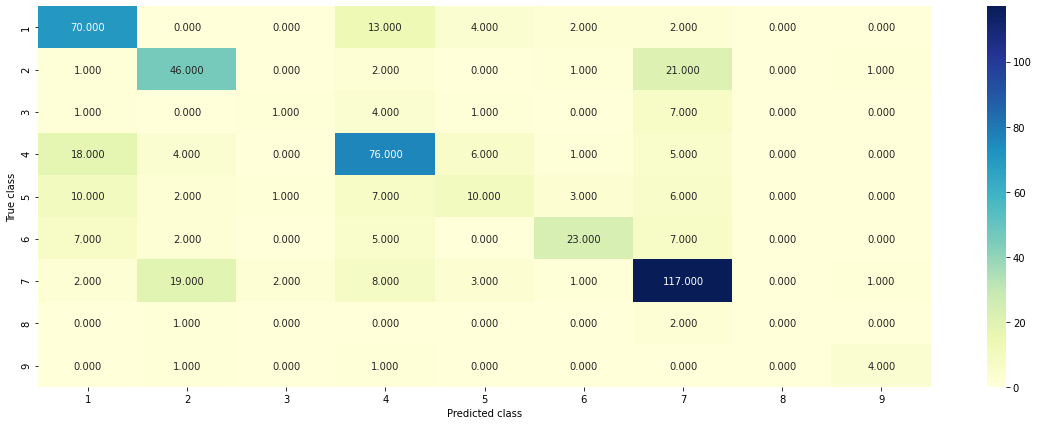

==================== Precision Matrix ====================


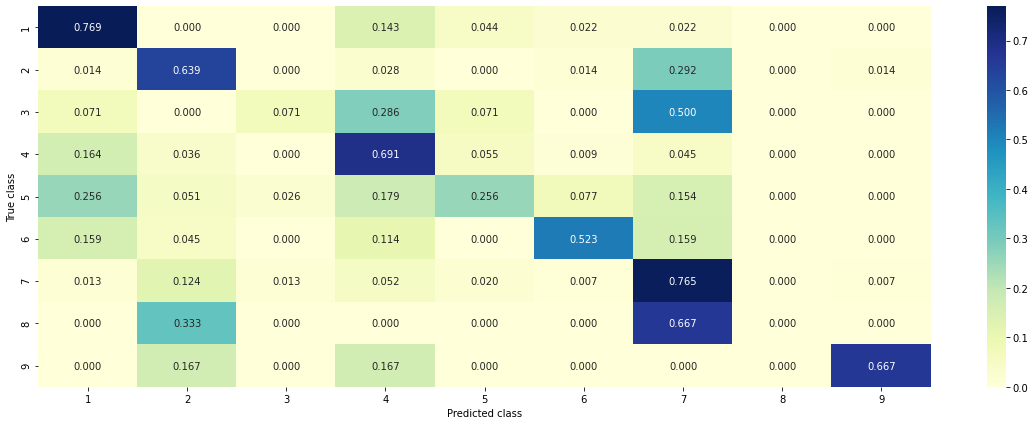

==================== Recall Matrix ====================


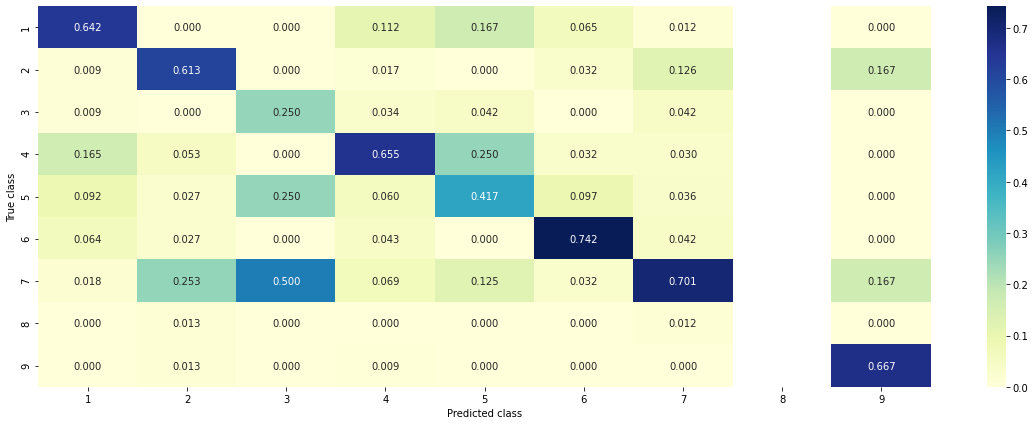

In [0]:
plot_confusion_matrix(y_cv, calib_clf.predict(X_val))

## 1.5 Model-3 : Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = [100,200,500,1000,2000]
max_depth = [5,10]

cv_log_loss = []
for i in n_estimators:
    for j in max_depth:
        print("for n_estimators:{} and max_depth:{}".format(i, j))
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(X_train, y_train)
        calib_clf = CalibratedClassifierCV(clf, method="sigmoid")
        calib_clf.fit(X_train, y_train)
        calib_clf_probs = calib_clf.predict_proba(X_val)
        cv_log_loss.append(log_loss(y_cv, calib_clf_probs, labels=clf.classes_, eps=1e-15))
        # to avoid rounding error while multiplying probabilites we use log-probability estimates
        print("Log Loss :",log_loss(y_cv, calib_clf_probs)) 

for n_estimators:100 and max_depth:5
Log Loss : 1.0037070034184827
for n_estimators:100 and max_depth:10
Log Loss : 0.8928290386434837
for n_estimators:200 and max_depth:5
Log Loss : 0.9910042746987268
for n_estimators:200 and max_depth:10
Log Loss : 0.8865735238674417
for n_estimators:500 and max_depth:5
Log Loss : 0.9921104049211217
for n_estimators:500 and max_depth:10
Log Loss : 0.8772003232407175
for n_estimators:1000 and max_depth:5
Log Loss : 1.0030943907330583
for n_estimators:1000 and max_depth:10
Log Loss : 0.8802015455373141
for n_estimators:2000 and max_depth:5
Log Loss : 1.007040185348454
for n_estimators:2000 and max_depth:10
Log Loss : 0.8841559233376286


In [0]:
print(cv_log_loss)

[1.0037070034184827, 0.8928290386434837, 0.9910042746987268, 0.8865735238674417, 0.9921104049211217, 0.8772003232407175, 1.0030943907330583, 0.8802015455373141, 1.007040185348454, 0.8841559233376286]


### 1.5.1 Modelling with best hyperparameter

In [0]:
best_n_estimator = n_estimators[int(np.argmin(cv_log_loss)/2)]
best_max_depth = max_depth[int(np.argmin(cv_log_loss)%2)]

clf = RandomForestClassifier(n_estimators=best_n_estimator, criterion='gini', max_depth=best_max_depth, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)
calib_clf = CalibratedClassifierCV(clf, method="sigmoid")
calib_clf.fit(X_train, y_train)

predict_y = calib_clf.predict_proba(X_train)
print('For values of best estimator = ', best_n_estimator, 'and the best_max_depth=',best_max_depth,"The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = calib_clf.predict_proba(X_val)
print('For values of best estimator = ', best_n_estimator, 'and the best_max_depth=',best_max_depth, "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = calib_clf.predict_proba(X_test)
print('For values of best estimator = ', best_n_estimator, 'and the best_max_depth=',best_max_depth, "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

For values of best estimator =  500 and the best_max_depth= 10 The train log loss is: 0.05310867330575982
For values of best estimator =  500 and the best_max_depth= 10 The cross validation log loss is: 0.8772003232407176
For values of best estimator =  500 and the best_max_depth= 10 The test log loss is: 0.9249309686890895


### 1.5.2 Plotting confusion matrix

==================== Confusion Matrix ====================


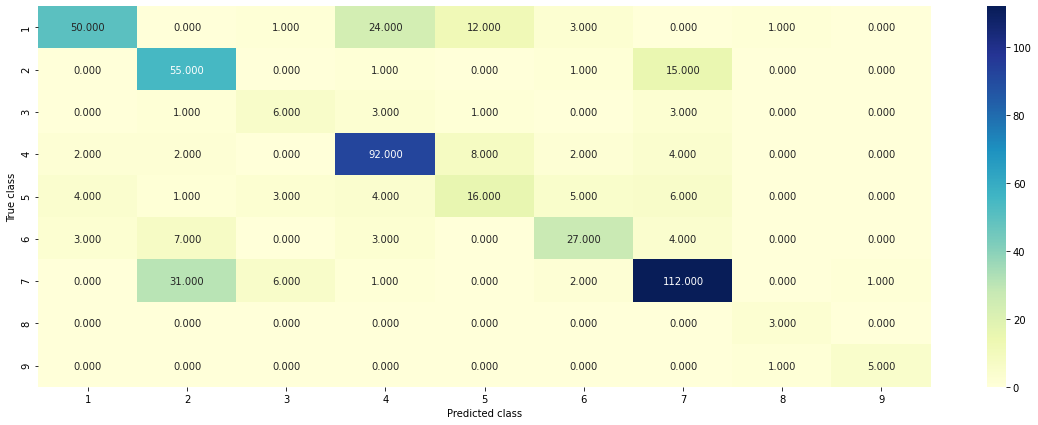

==================== Precision Matrix ====================


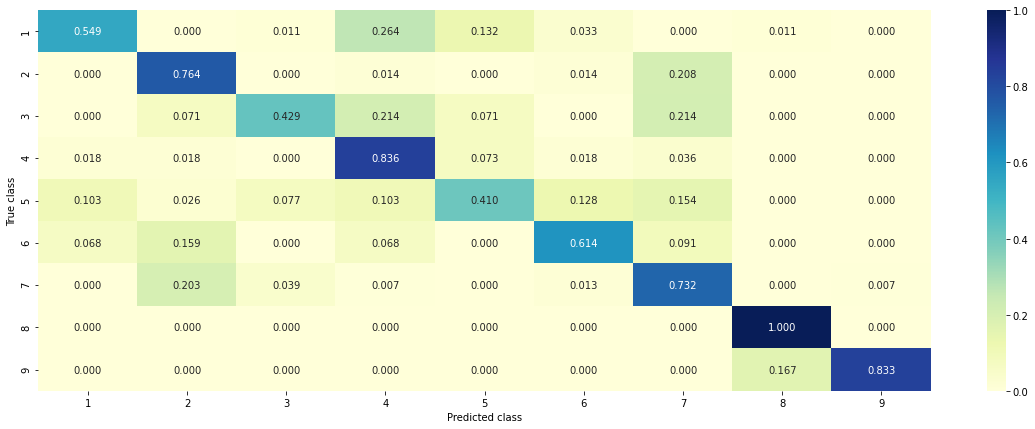

==================== Recall Matrix ====================


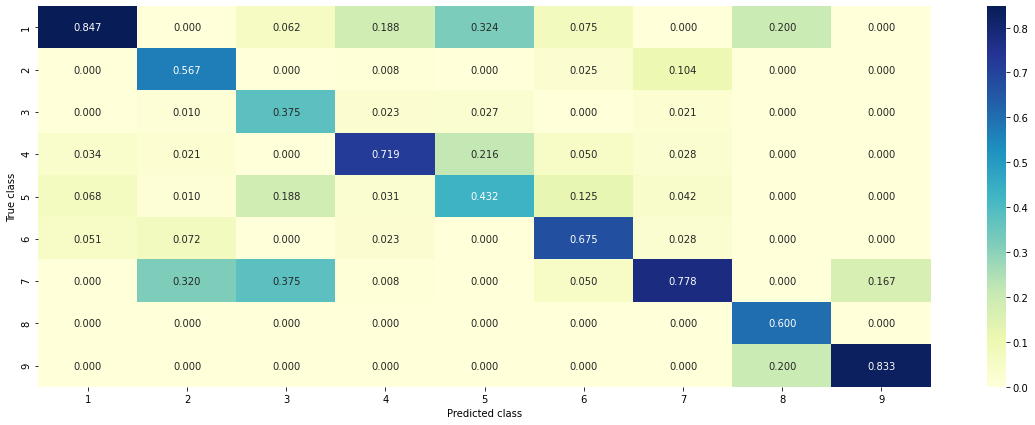

In [0]:
plot_confusion_matrix(y_cv, calib_clf.predict(X_val))

### 1.5.3 Feature importance

In [0]:
test_point_index = 46

clf = RandomForestClassifier(n_estimators=best_n_estimator, criterion='gini', max_depth=best_max_depth, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)
calib_clf = CalibratedClassifierCV(clf, method="sigmoid")
calib_clf.fit(X_train, y_train)

print('Actual class of the test point', y_test[test_point_index])
print('predicted class of the test point', calib_clf.predict(X_test[test_point_index].reshape(1,-1)))
print('Predicted probs of the test point', calib_clf.predict_proba(X_test[test_point_index].reshape(1,-1)))

indices = np.argsort(-clf.feature_importances_)
for i in indices:
    if i<9:
        print('Gene feature of index {} is important'.format(i))
    elif i>9 and i<19:
        print('Variation feature of index {} is important'.format(i))
    elif i>18:
        print('Text feature of index {} is important'.format(i))

## Note: The output is removed

## 1.6 Model-4: Linear SVM

In [0]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss

alpha = [10**x for x in range(-5,1)]

cv_log_loss = []
for i in alpha :
    clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    calib_clf = CalibratedClassifierCV(clf, method='sigmoid')
    calib_clf.fit(X_train, y_train)
    predict_y = calib_clf.predict_proba(X_val)
    logloss  = log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15)
    cv_log_loss.append(logloss)
    print('For the value of alpha:{}, the log_loss is {}'.format(i, logloss))

For the value of alpha:1e-05, the log_loss is 1.1146945983300356
For the value of alpha:0.0001, the log_loss is 1.1533809111489735
For the value of alpha:0.001, the log_loss is 1.2520229405690908
For the value of alpha:0.01, the log_loss is 1.346701482258082
For the value of alpha:0.1, the log_loss is 1.4029143200268437
For the value of alpha:1, the log_loss is 1.5344838568204004


### 1.6.1 Plotting Hyperparameter vs Log_loss

1e-05 : 1.1146945983300356
0.0001 : 1.1533809111489735
0.001 : 1.2520229405690908
0.01 : 1.346701482258082
0.1 : 1.4029143200268437
1 : 1.5344838568204004


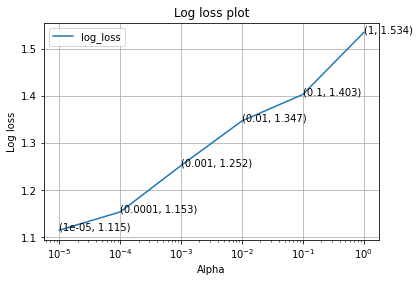

In [0]:
plt.plot(alpha, cv_log_loss, label='log_loss')
for i, j in enumerate(cv_log_loss):
  print(alpha[i],':',j)
  plt.annotate((alpha[i], np.round(j, 3)), (alpha[i], j))
plt.title('Log loss plot')
plt.xlabel('Alpha')
plt.ylabel('Log loss')
plt.xscale('log')
plt.legend()
plt.grid()
plt.show()

### 1.6.2 Modelling by best Hyperparameter

In [0]:
best_alpha = alpha[np.argmin(cv_log_loss)]
clf = SGDClassifier(alpha=best_alpha, loss='hinge', penalty='l2', random_state=42)
clf.fit(X_train, y_train)
calib_clf = CalibratedClassifierCV(clf, method='sigmoid')
calib_clf.fit(X_train, y_train)


predicted_y = calib_clf.predict_proba(X_train)
print('Training log loss for tfidf encoded gene feature:', log_loss(y_train, predicted_y, labels=clf.classes_, eps=1e-15))

predicted_y = calib_clf.predict_proba(X_val)
print('Cv log loss for tfidf encoded gene feature:', log_loss(y_cv, predicted_y, labels=clf.classes_, eps=1e-15))

predicted_y = calib_clf.predict_proba(X_test)
print('Test log loss for tfidf encoded gene feature:', log_loss(y_test, predicted_y, labels=clf.classes_, eps=1e-15))

Training log loss for tfidf encoded gene feature: 0.7927650355067571
Cv log loss for tfidf encoded gene feature: 1.1146945983300356
Test log loss for tfidf encoded gene feature: 1.0945302954881029


### 1.6.3 Plot Confusion matrix

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


==================== Confusion Matrix ====================


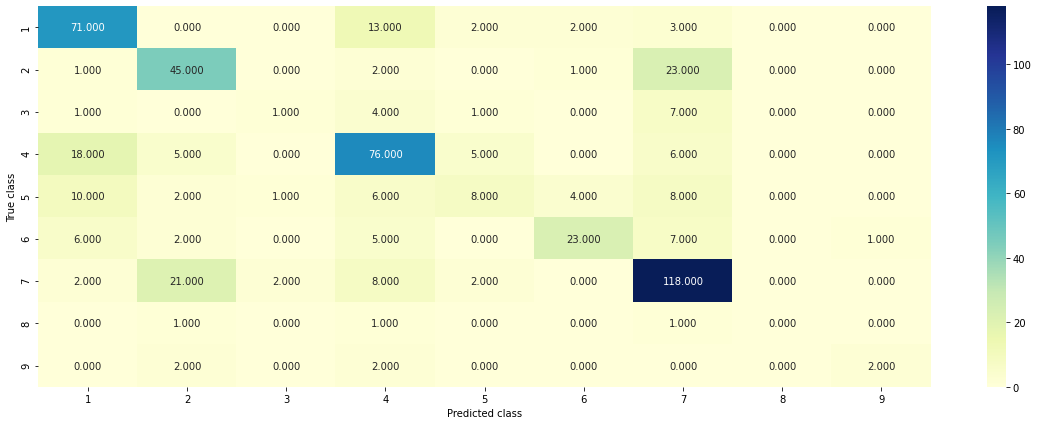

==================== Precision Matrix ====================


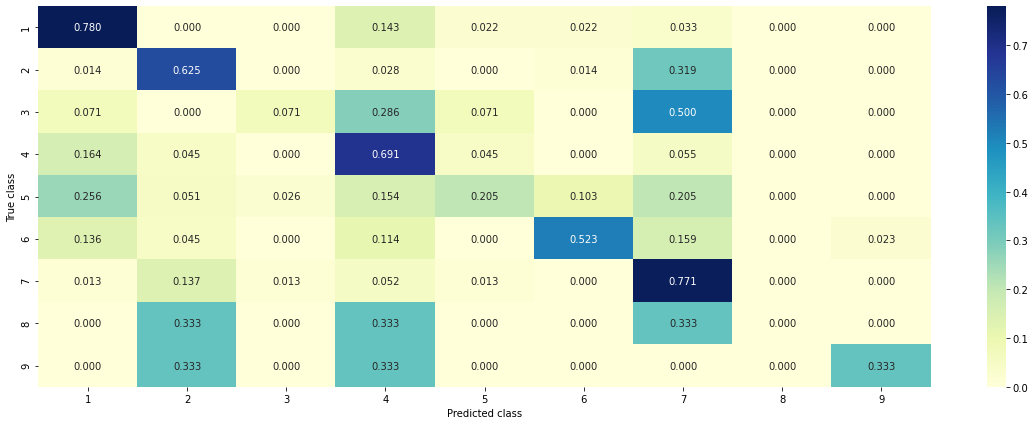

==================== Recall Matrix ====================


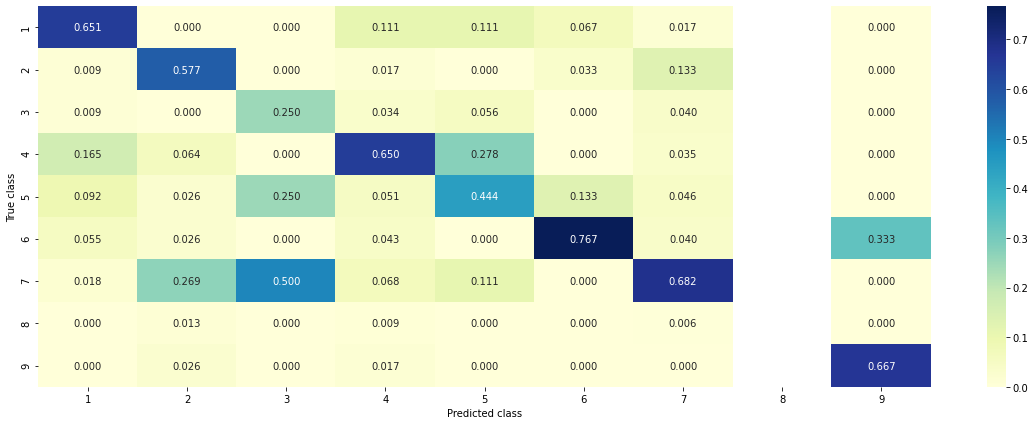

In [0]:
plot_confusion_matrix(y_cv, calib_clf.predict(X_val))

# Summary:

In [0]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ['Model', 'Training Log loss', 'Validation log loss', 'Test log loss']
x.add_row(['Linear SVM', '0.729', '1.146', '1.0945'])
x.add_row(['Random Forest', '0.05', '0.87', '0.92'])
x.add_row(['Logistic Regression', '0.758', '1.107', '1.087'])
print(x)

+---------------------+-------------------+---------------------+---------------+
|        Model        | Training Log loss | Validation log loss | Test log loss |
+---------------------+-------------------+---------------------+---------------+
|      Linear SVM     |       0.729       |        1.146        |     1.0945    |
|    Random Forest    |        0.05       |         0.87        |      0.92     |
| Logistic Regression |       0.758       |        1.107        |     1.087     |
+---------------------+-------------------+---------------------+---------------+


- We can see that using the Avg_W2V from Glove for text data we can obtain log loss less than 1 by using the model Random Forest